<a href="https://colab.research.google.com/github/TristanDao/Report-ML---WINE-QUALITY-PREDICTION/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án Máy Học - Phân tích và Dự đoán Chất lượng Rượu Vang

## Dataset: Wine Quality - UCI Machine Learning Repository


## 1. Import thư viện cần thiết


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from urllib.request import urlretrieve
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)

import xgboost as xgb
import lightgbm as lgb

warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 2. Tải và Load dữ liệu


In [ ]:
# Tạo thư mục data nếu chưa có
if not os.path.exists('data'):
    os.makedirs('data')

# URLs của dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Tải dữ liệu nếu chưa có
if not os.path.exists('data/winequality-red.csv'):
    print('Đang tải dữ liệu wine đỏ...')
    urlretrieve(red_wine_url, 'data/winequality-red.csv')
    print('Đã tải xong!')

if not os.path.exists('data/winequality-white.csv'):
    print('Đang tải dữ liệu wine trắng...')
    urlretrieve(white_wine_url, 'data/winequality-white.csv')
    print('Đã tải xong!')

# Load dữ liệu
df_red = pd.read_csv('data/winequality-red.csv', sep=';')
df_white = pd.read_csv('data/winequality-white.csv', sep=';')

# Thêm cột loại rượu
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

# Gộp dữ liệu
df = pd.concat([df_red, df_white], ignore_index=True)

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nSố mẫu wine đỏ: {len(df_red)}")
print(f"Số mẫu wine trắng: {len(df_white)}")
print(f"\n5 dòng đầu tiên:")
df.head()

Kích thước dữ liệu: (6497, 13)

Số mẫu wine đỏ: 1599
Số mẫu wine trắng: 4898

5 dòng đầu tiên:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 3. Phân tích dữ liệu (EDA)


### 3.1. Thống kê mô tả dữ liệu


In [ ]:
print("=== THỐNG KÊ MÔ TẢ DỮ LIỆU ===")
print(df.describe())
print("\n=== THÔNG TIN DỮ LIỆU ===")
print(df.info())
print("\n=== TÊN CÁC CỘT ===")
print(df.columns.tolist())

=== THỐNG KÊ MÔ TẢ DỮ LIỆU ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.00900

In [ ]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.000000,7.215307,1.296434,3.800000,6.400000,7.000000,7.700000,15.900000
volatile acidity,6497.000000,0.339666,0.164636,0.080000,0.230000,0.290000,0.400000,1.580000
citric acid,6497.000000,0.318633,0.145318,0.000000,0.250000,0.310000,0.390000,1.660000
residual sugar,6497.000000,5.443235,4.757804,0.600000,1.800000,3.000000,8.100000,65.800000
chlorides,6497.000000,0.056034,0.035034,0.009000,0.038000,0.047000,0.065000,0.611000
free sulfur dioxide,6497.000000,30.525319,17.749400,1.000000,17.000000,29.000000,41.000000,289.000000
total sulfur dioxide,6497.000000,115.744574,56.521855,6.000000,77.000000,118.000000,156.000000,440.000000
density,6497.000000,0.994697,0.002999,0.987110,0.992340,0.994890,0.996990,1.038980
pH,6497.000000,3.218501,0.160787,2.720000,3.110000,3.210000,3.320000,4.010000
sulphates,6497.000000,0.531268,0.148806,0.220000,0.430000,0.510000,0.600000,2.000000


### 3.2. Kiểm tra giá trị thiếu


In [ ]:
print("=== KIỂM TRA GIÁ TRỊ THIẾU ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Số lượng thiếu': missing_values,
    'Tỷ lệ %': missing_percent
})
print(missing_df[missing_df['Số lượng thiếu'] > 0])
if missing_df['Số lượng thiếu'].sum() == 0:
    print("\n✓ Không có giá trị thiếu trong dataset!")

=== KIỂM TRA GIÁ TRỊ THIẾU ===
Empty DataFrame
Columns: [Số lượng thiếu, Tỷ lệ %]
Index: []

✓ Không có giá trị thiếu trong dataset!


### 3.3. Phân bố của biến mục tiêu (quality)


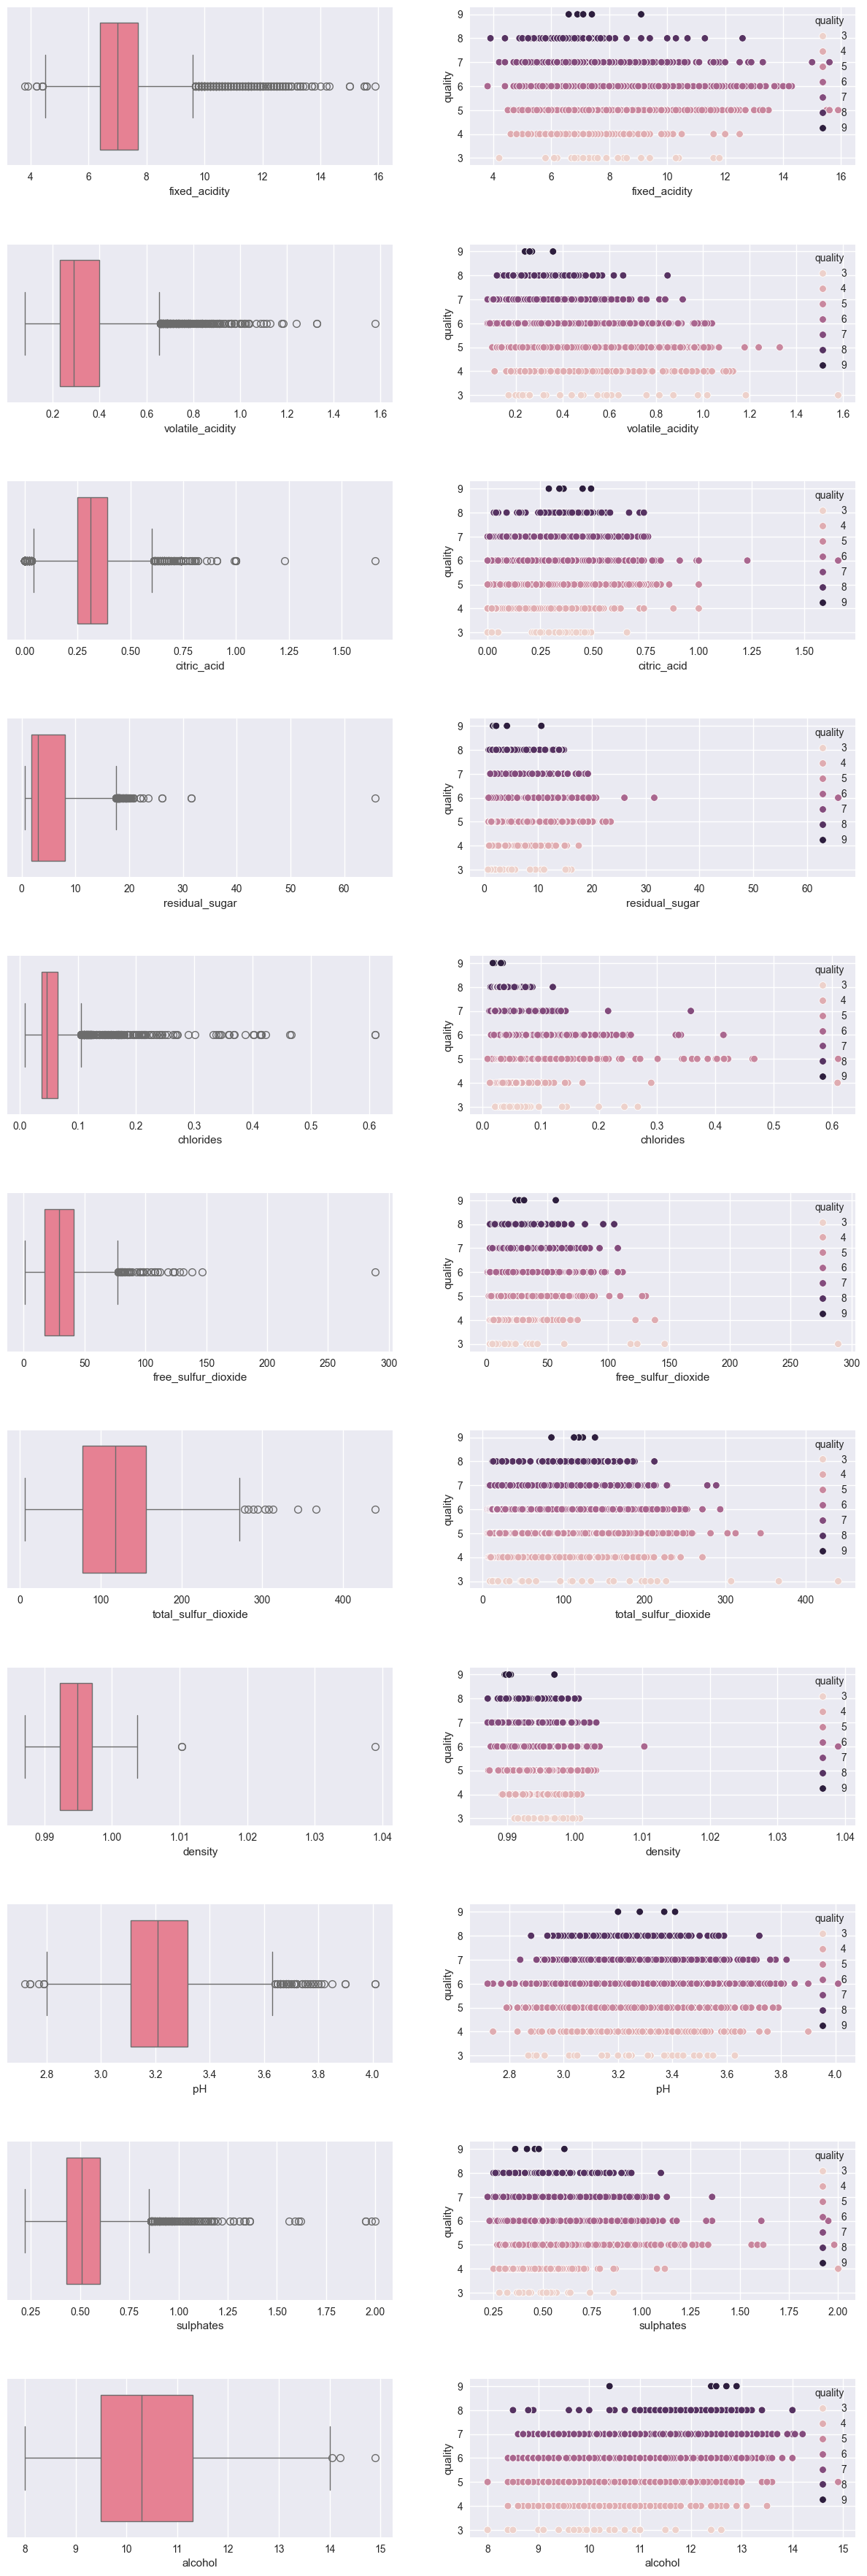

In [ ]:
df.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

columns = list(df.columns)

fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=df, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=df, hue='quality', ax=ax[i, 1])

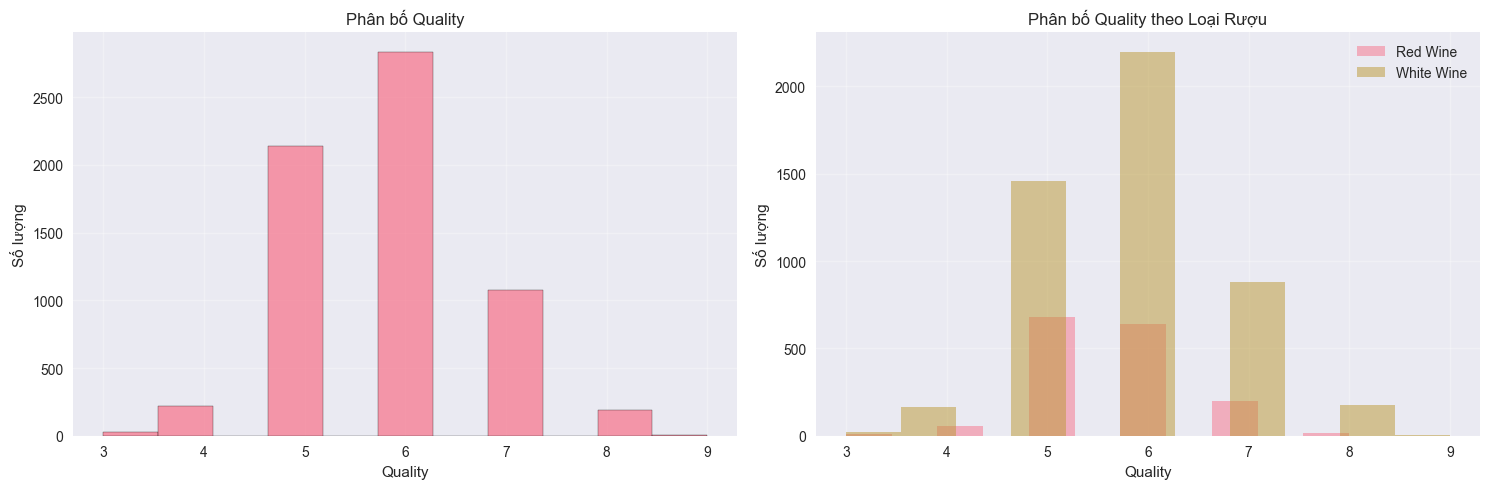


=== THỐNG KÊ QUALITY ===
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Phân bố quality
axes[0].hist(df['quality'], bins=11, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân bố Quality')
axes[0].grid(True, alpha=0.3)

# Phân bố quality theo loại rượu
df_red['quality'].hist(alpha=0.5, label='Red Wine', bins=11, ax=axes[1])
df_white['quality'].hist(alpha=0.5, label='White Wine', bins=11, ax=axes[1])
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân bố Quality theo Loại Rượu')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== THỐNG KÊ QUALITY ===")
print(df['quality'].value_counts().sort_index())

### 3.4. Phân bố các đặc trưng


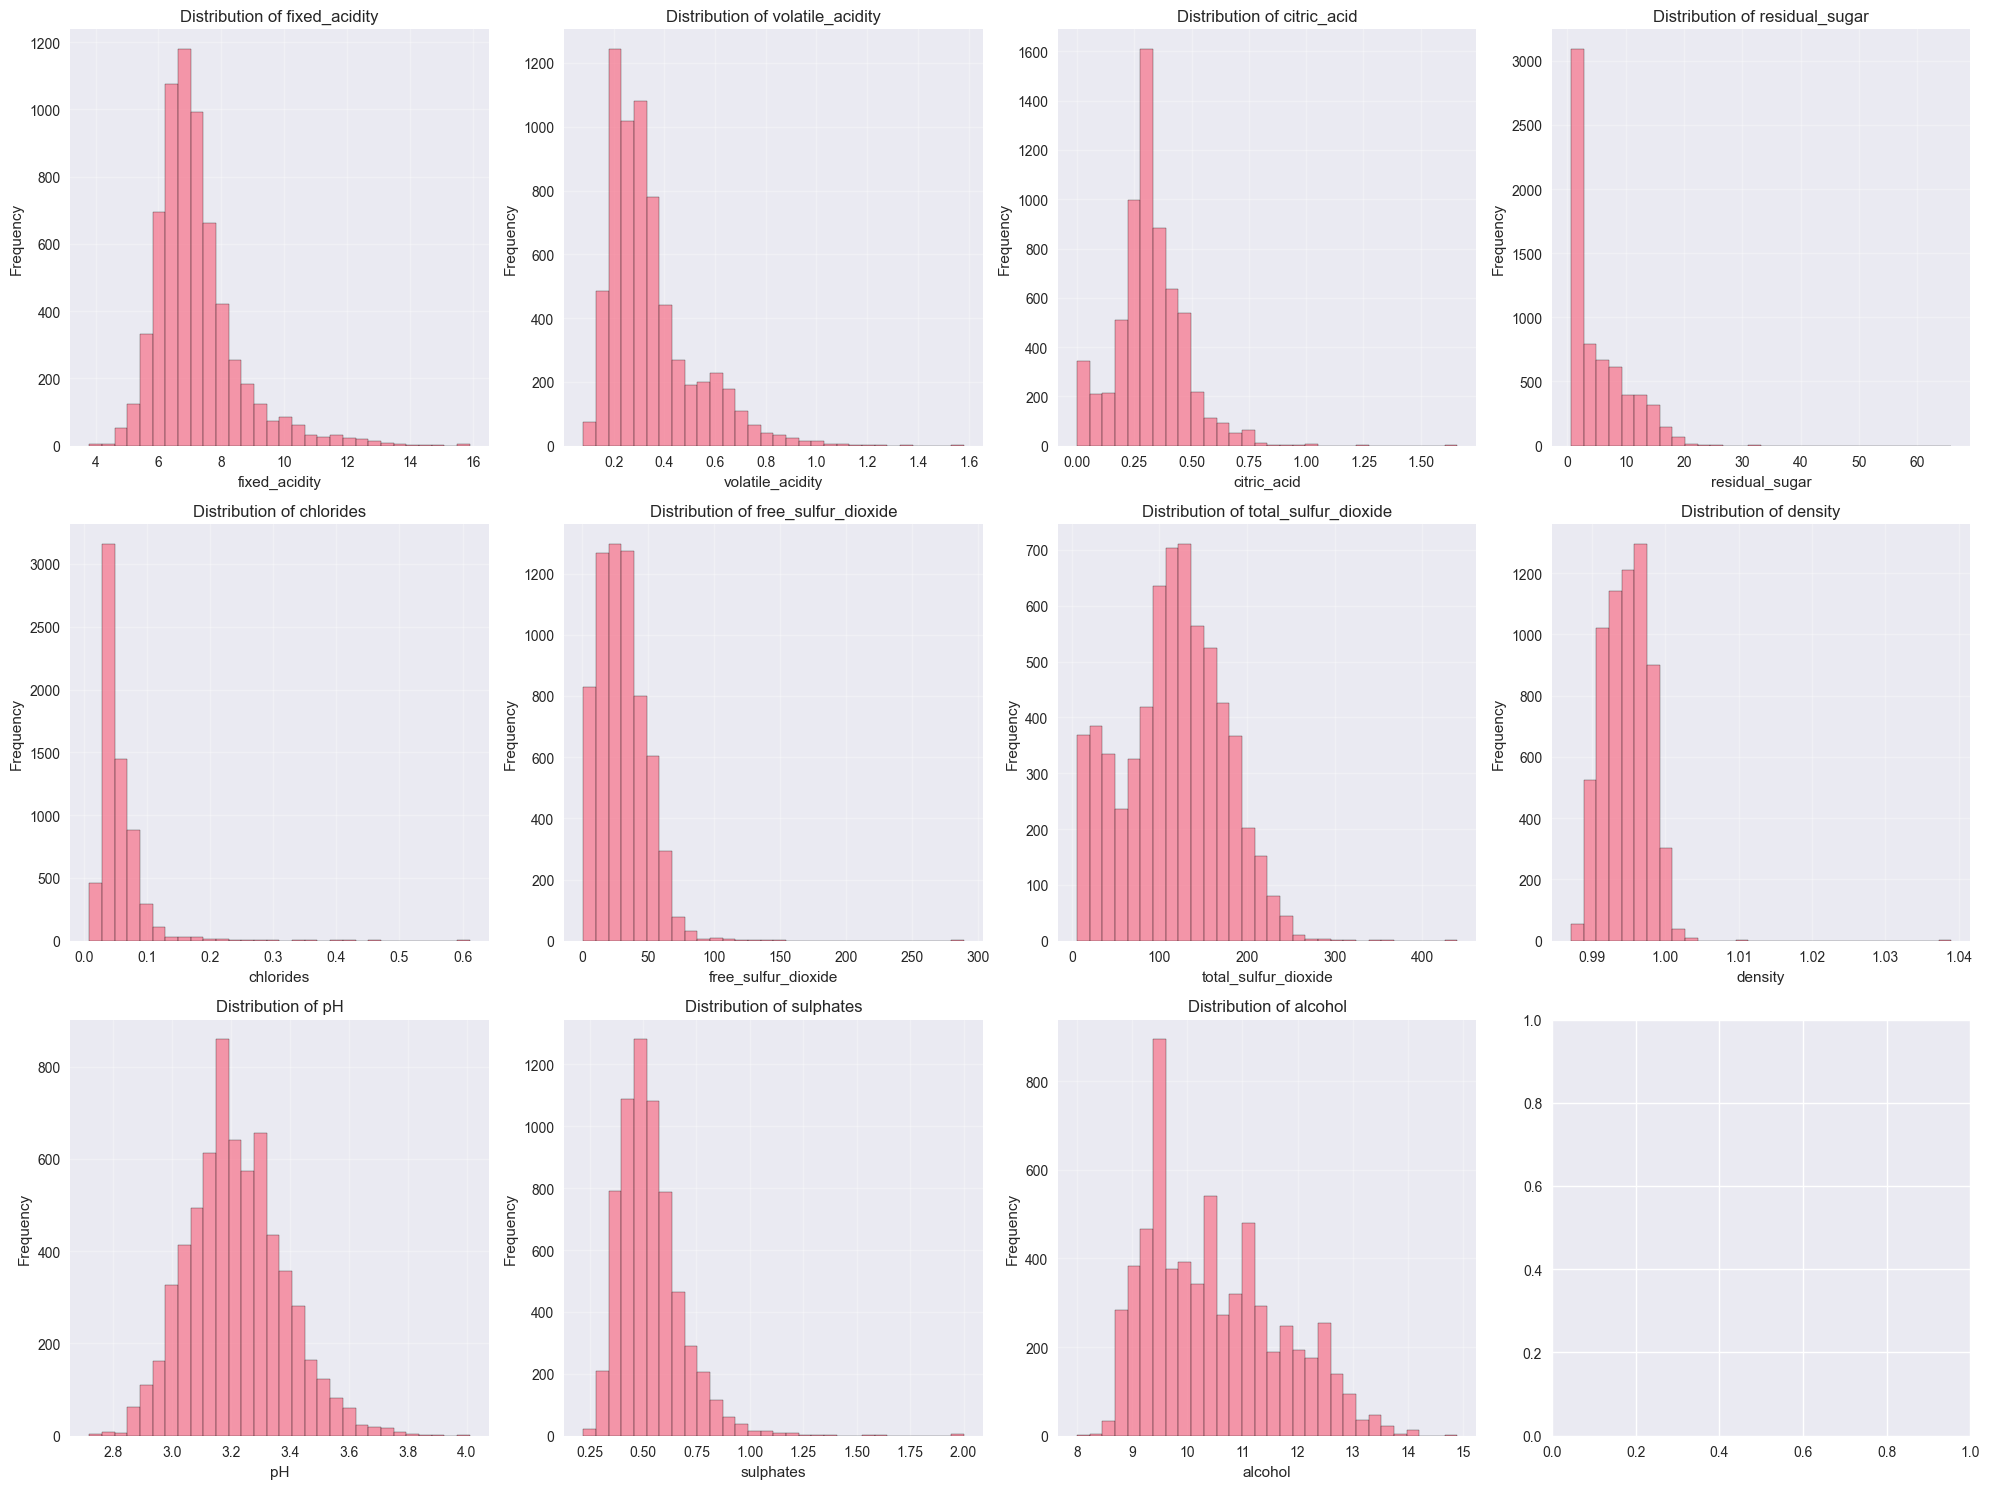

In [ ]:
features = [col for col in df.columns if col not in ['quality', 'wine_type']]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.5. Ma trận tương quan


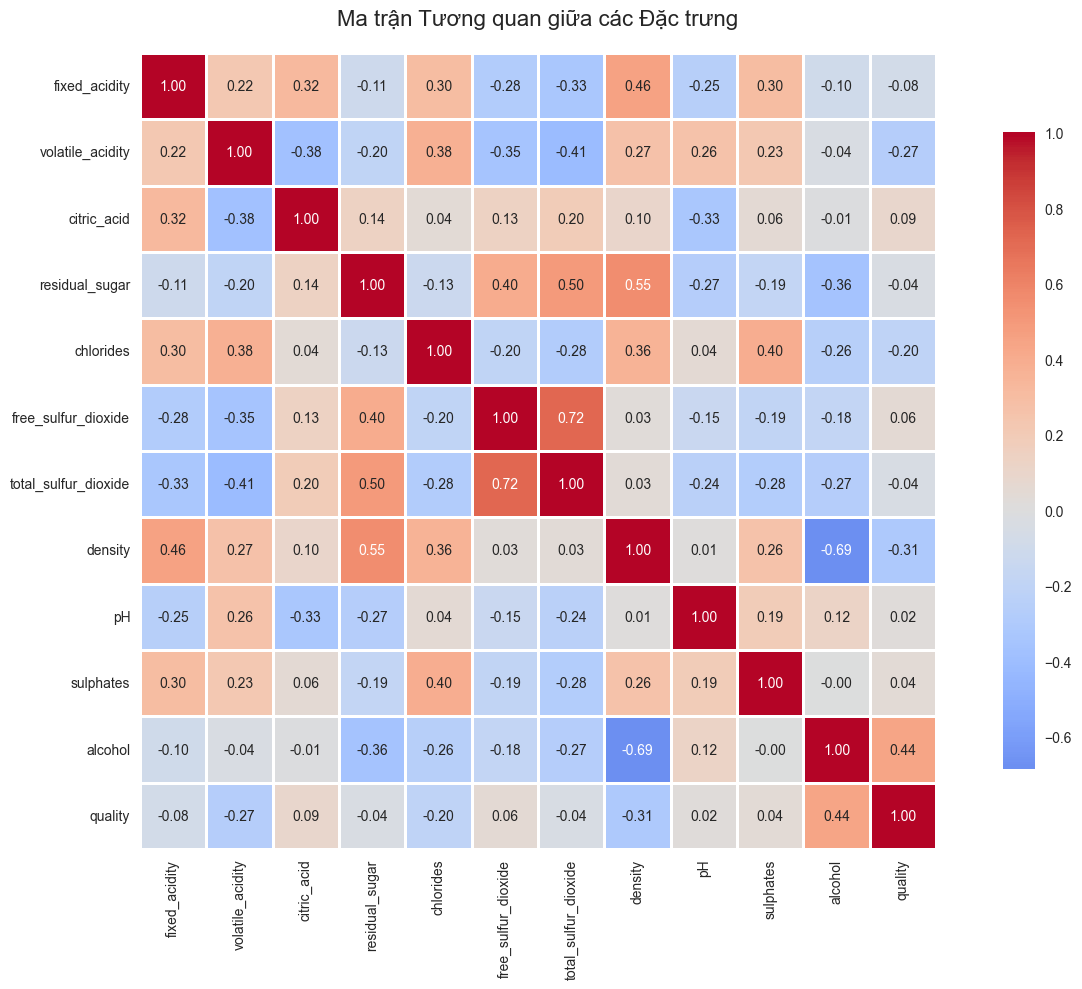


=== TƯƠNG QUAN VỚI QUALITY ===
quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[features + ['quality']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận Tương quan giữa các Đặc trưng', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Tương quan với quality
print("\n=== TƯƠNG QUAN VỚI QUALITY ===")
corr_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
print(corr_with_quality)


### 3.6. Phân tích mất cân bằng lớp


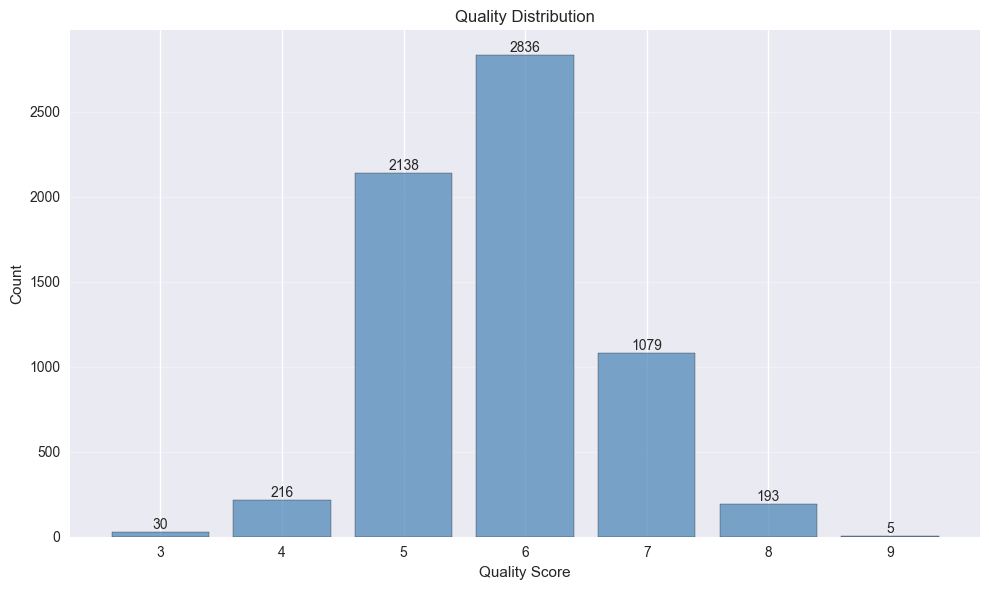


=== PHÂN TÍCH MẤT CÂN BẰNG ===
Tỷ lệ mẫu quality 5: 32.91%
Tỷ lệ mẫu quality 6: 43.65%
Tỷ lệ mẫu quality 7: 16.61%

→ Dataset bị mất cân bằng, quality 5 và 6 chiếm đa số.


In [ ]:
quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(quality_counts.index, quality_counts.values,
               color='steelblue', edgecolor='black', alpha=0.7)

# Thay đổi nhãn sang tiếng Anh
plt.xlabel('Quality Score')
plt.ylabel('Count') # Hoặc 'Number of Samples'
plt.title('Quality Distribution') # Hoặc giữ nguyên 'Quality'
plt.grid(True, alpha=0.3, axis='y')

# Thêm nhãn số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\n=== PHÂN TÍCH MẤT CÂN BẰNG ===")
print(f"Tỷ lệ mẫu quality 5: {quality_counts.get(5, 0) / len(df) * 100:.2f}%")
print(f"Tỷ lệ mẫu quality 6: {quality_counts.get(6, 0) / len(df) * 100:.2f}%")
print(f"Tỷ lệ mẫu quality 7: {quality_counts.get(7, 0) / len(df) * 100:.2f}%")
print(f"\n→ Dataset bị mất cân bằng, quality 5 và 6 chiếm đa số.")


## 4. Tiền xử lý dữ liệu


### 4.1. Chuyển quality thành nhãn phân loại nhị phân


=== BINARY LABEL DISTRIBUTION ===
quality_binary
1    4113
0    2384
Name: count, dtype: int64

Low Quality Ratio: 36.69%
High Quality Ratio: 63.31%


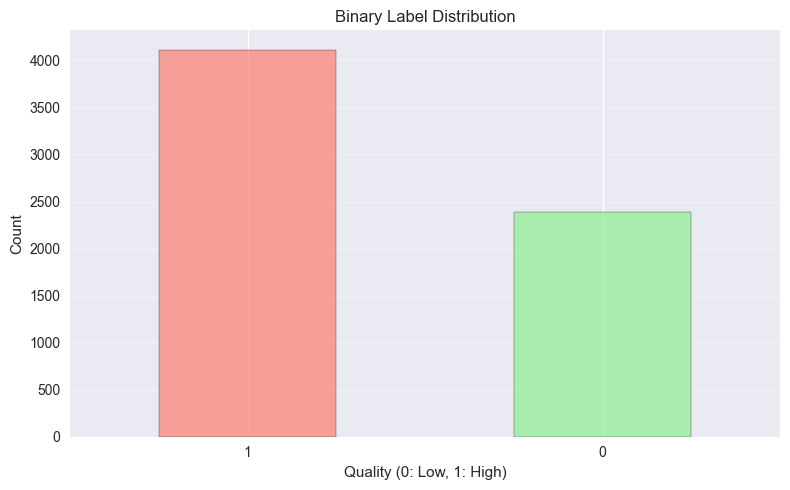

In [ ]:
# Tạo bản sao để không ảnh hưởng dữ liệu gốc
df_processed = df.copy()

# Chuyển quality thành nhãn nhị phân
# 0 → chất lượng thấp (quality ≤ 5)
# 1 → chất lượng cao (quality ≥ 6)
df_processed['quality_binary'] = (df_processed['quality'] >= 6).astype(int)

# Chuyển đổi nội dung in ra console
print("=== BINARY LABEL DISTRIBUTION ===")
print(df_processed['quality_binary'].value_counts())
print(f"\nLow Quality Ratio: {(df_processed['quality_binary'] == 0).sum() / len(df_processed) * 100:.2f}%")
print(f"High Quality Ratio: {(df_processed['quality_binary'] == 1).sum() / len(df_processed) * 100:.2f}%")

plt.figure(figsize=(8, 5))
df_processed['quality_binary'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'],
                                                   edgecolor='black', alpha=0.7)

# Chuyển đổi nhãn biểu đồ sang tiếng Anh
plt.xlabel('Quality (0: Low, 1: High)')
plt.ylabel('Count')
plt.title('Binary Label Distribution')

plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# features = [col for col in df_processed.columns if col not in ['quality', 'wine_type', 'quality_binary']]

# fig, axes = plt.subplots(3, 4, figsize=(20, 15))
# axes = axes.flatten()

# for i, feature in enumerate(features):
#     if i < len(axes): # Ensure we don't try to plot more features than we have axes
#         sns.histplot(data=df_processed, x=feature, hue='quality_binary', bins=30, kde=True, ax=axes[i])
#         axes[i].set_title(f'Distribution of {feature} by Quality Binary')
#         axes[i].set_xlabel(feature)
#         axes[i].set_ylabel('Frequency')
#         axes[i].grid(True, alpha=0.3)

# # Remove any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

### 4.2. Xử lý outliers bằng IQR method


In [ ]:
def remove_outliers_iqr(df, columns):
    """Loại bỏ outliers sử dụng phương pháp IQR"""
    df_clean = df.copy()
    initial_count = len(df_clean)

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    removed_count = initial_count - len(df_clean)
    print(f"Đã loại bỏ {removed_count} mẫu outliers ({removed_count/initial_count*100:.2f}%)")
    return df_clean

# Chọn các đặc trưng để xử lý outliers (không bao gồm quality và wine_type)
feature_cols = [col for col in df_processed.columns if col not in ['quality', 'wine_type', 'quality_binary']]

# Loại bỏ outliers
df_processed = remove_outliers_iqr(df_processed, feature_cols)
print(f"Kích thước dữ liệu sau khi xử lý outliers: {df_processed.shape}")


Đã loại bỏ 1901 mẫu outliers (29.26%)
Kích thước dữ liệu sau khi xử lý outliers: (4596, 14)


### 4.3. Chuẩn hóa dữ liệu và chia train/test


In [ ]:
# Chuẩn bị dữ liệu
X = df_processed[feature_cols].copy()
y = df_processed['quality_binary'].copy()

# Thử nghiệm với nhiều tỷ lệ train/test
test_sizes = [0.1, 0.2, 0.3]
results_summary = {}

print("=== CHUẨN HÓA VÀ CHIA DỮ LIỆU ===")
print(f"Tổng số mẫu: {len(X)}")
print(f"Số đặc trưng: {len(feature_cols)}")

# Lưu các scaler và dataset cho từng tỷ lệ
datasets = {}

for test_size in test_sizes:
    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Chuẩn hóa dữ liệu (sử dụng StandardScaler)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    datasets[test_size] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': feature_cols
    }

    print(f"\nTest size = {test_size}:")
    print(f"  Train: {len(X_train_scaled)} mẫu")
    print(f"  Test: {len(X_test_scaled)} mẫu")

# Sử dụng test_size = 0.2 làm mặc định cho các phần tiếp theo
X_train = datasets[0.2]['X_train']
X_test = datasets[0.2]['X_test']
y_train = datasets[0.2]['y_train']
y_test = datasets[0.2]['y_test']
feature_names = datasets[0.2]['feature_names']


=== CHUẨN HÓA VÀ CHIA DỮ LIỆU ===
Tổng số mẫu: 4596
Số đặc trưng: 11

Test size = 0.1:
  Train: 4136 mẫu
  Test: 460 mẫu

Test size = 0.2:
  Train: 3676 mẫu
  Test: 920 mẫu

Test size = 0.3:
  Train: 3217 mẫu
  Test: 1379 mẫu


## 5. Xây dựng và Đánh giá Mô hình


### 5.1. Hàm đánh giá mô hình


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Đánh giá mô hình với các metrics"""
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # ROC AUC
    roc_auc = None
    if y_test_proba is not None:
        roc_auc = roc_auc_score(y_test, y_test_proba)

    results = {
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_test_proba': y_test_proba,
        'model': model
    }

    return results

def plot_confusion_matrix(cm, model_name):
    """Vẽ confusion matrix"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Chất lượng thấp', 'Chất lượng cao'],
                yticklabels=['Chất lượng thấp', 'Chất lượng cao'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_test, y_proba, model_name, roc_auc):
    """Vẽ ROC curve"""
    if y_proba is None:
        return

    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### 5.2. Logistic Regression (Baseline)


=== LOGISTIC REGRESSION ===
Train Accuracy: 0.7454
Test Accuracy: 0.7424
Precision: 0.7734
Recall: 0.8806
F1-Score: 0.8235
ROC AUC: 0.7915


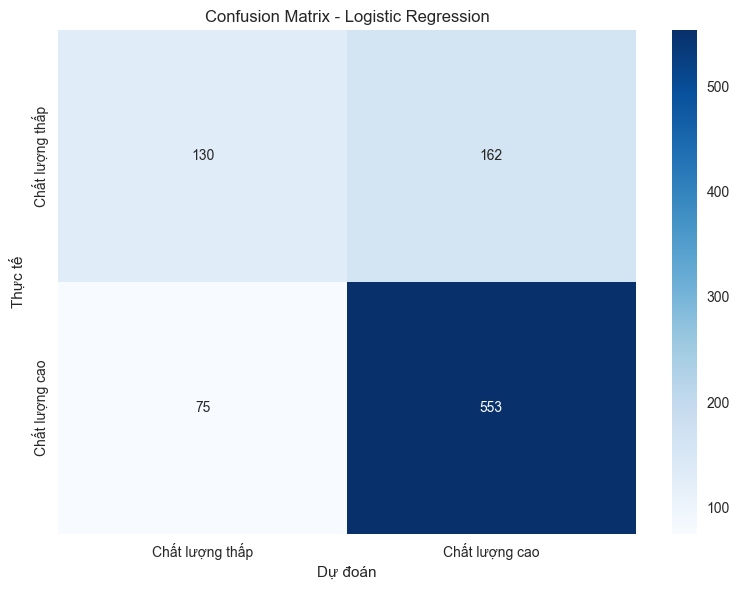

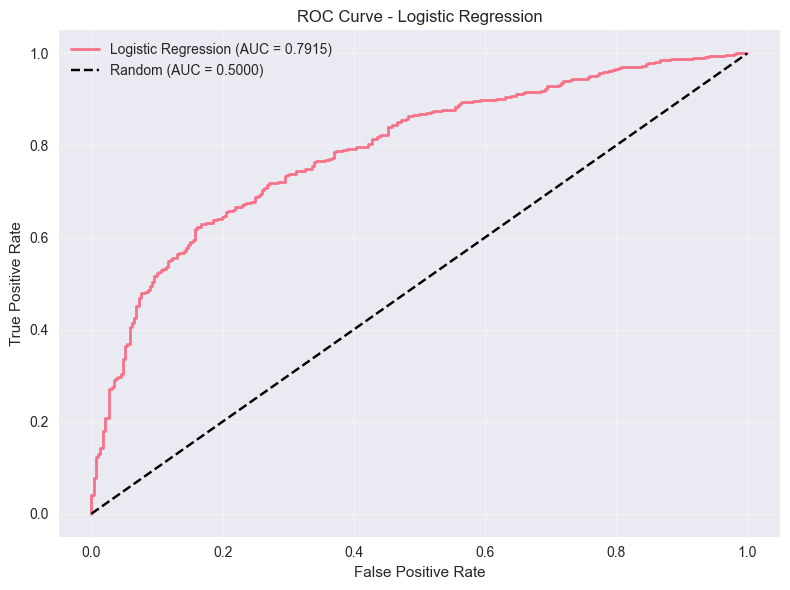

In [ ]:
print("=== LOGISTIC REGRESSION ===")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = evaluate_model(lr_model, X_train, X_test, y_train, y_test, 'Logistic Regression')

print(f"Train Accuracy: {lr_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {lr_results['test_accuracy']:.4f}")
print(f"Precision: {lr_results['precision']:.4f}")
print(f"Recall: {lr_results['recall']:.4f}")
print(f"F1-Score: {lr_results['f1_score']:.4f}")
print(f"ROC AUC: {lr_results['roc_auc']:.4f}")

plot_confusion_matrix(lr_results['confusion_matrix'], 'Logistic Regression')
plot_roc_curve(y_test, lr_results['y_test_proba'], 'Logistic Regression', lr_results['roc_auc'])


### 5.3. Decision Tree


=== DECISION TREE ===
Train Accuracy: 0.8928
Test Accuracy: 0.7543
Precision: 0.8121
Recall: 0.8328
F1-Score: 0.8223
ROC AUC: 0.7776


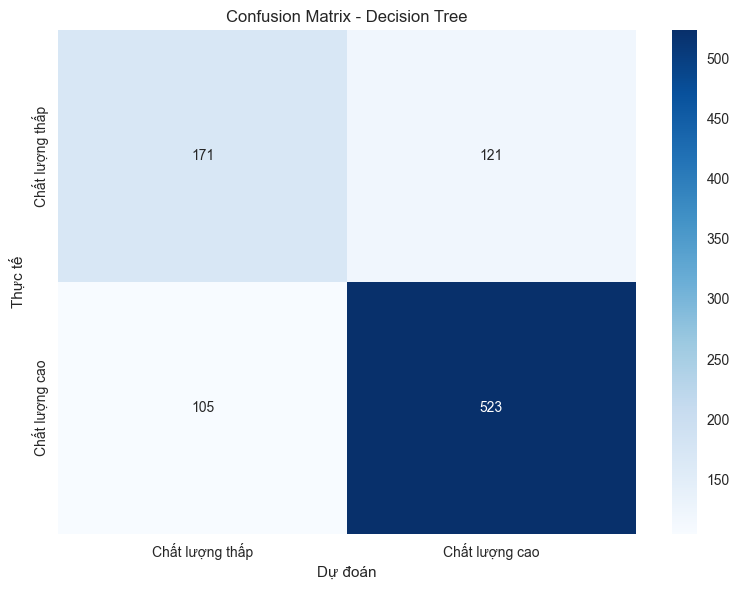

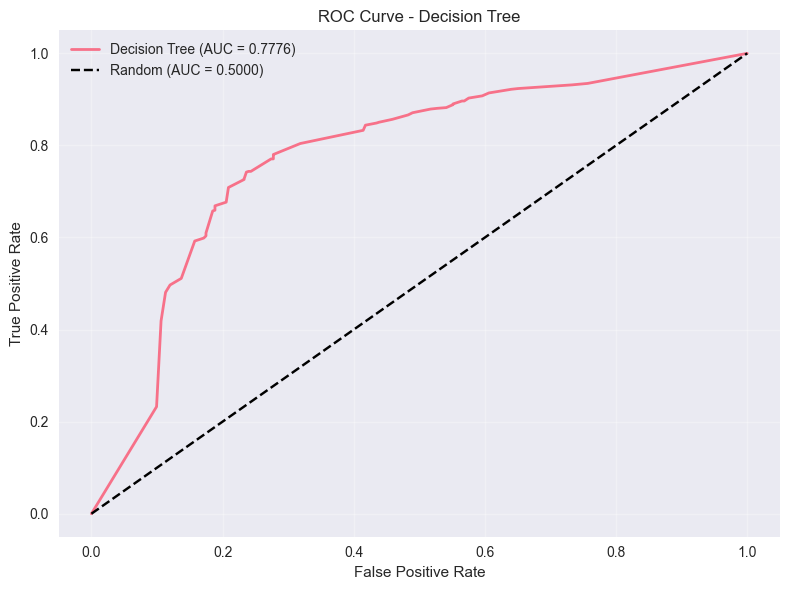

In [ ]:
print("=== DECISION TREE ===")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

print(f"Train Accuracy: {dt_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {dt_results['test_accuracy']:.4f}")
print(f"Precision: {dt_results['precision']:.4f}")
print(f"Recall: {dt_results['recall']:.4f}")
print(f"F1-Score: {dt_results['f1_score']:.4f}")
print(f"ROC AUC: {dt_results['roc_auc']:.4f}")

plot_confusion_matrix(dt_results['confusion_matrix'], 'Decision Tree')
plot_roc_curve(y_test, dt_results['y_test_proba'], 'Decision Tree', dt_results['roc_auc'])


### 5.4. LightGBM


=== LIGHTGBM ===
Train Accuracy: 0.9616
Test Accuracy: 0.8217
Precision: 0.8591
Recall: 0.8838
F1-Score: 0.8713
ROC AUC: 0.8793


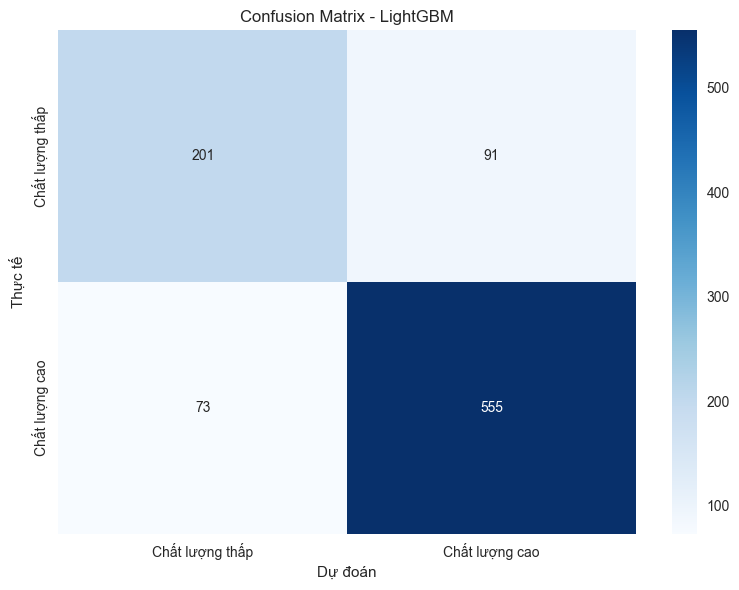

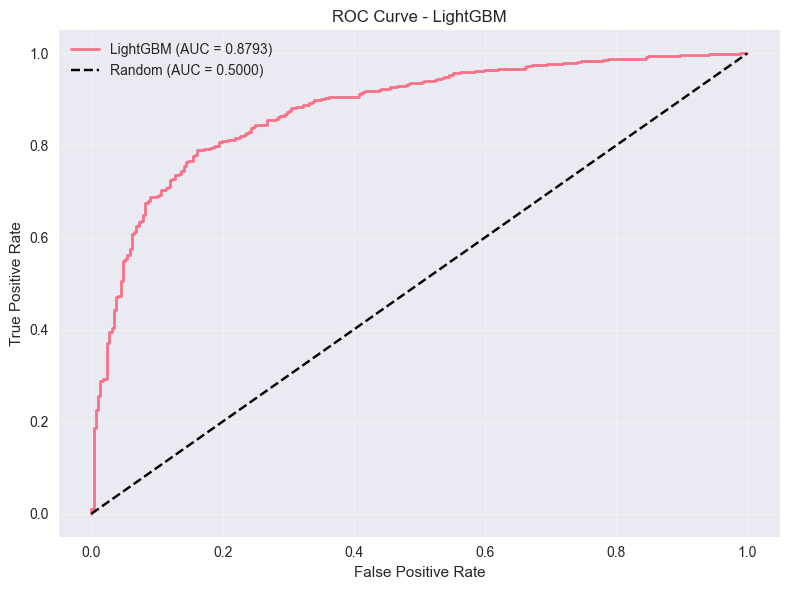

In [ ]:
print("=== LIGHTGBM ===")
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_results = evaluate_model(lgb_model, X_train, X_test, y_train, y_test, 'LightGBM')

print(f"Train Accuracy: {lgb_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {lgb_results['test_accuracy']:.4f}")
print(f"Precision: {lgb_results['precision']:.4f}")
print(f"Recall: {lgb_results['recall']:.4f}")
print(f"F1-Score: {lgb_results['f1_score']:.4f}")
print(f"ROC AUC: {lgb_results['roc_auc']:.4f}")

plot_confusion_matrix(lgb_results['confusion_matrix'], 'LightGBM')
plot_roc_curve(y_test, lgb_results['y_test_proba'], 'LightGBM', lgb_results['roc_auc'])


### 5.5. XGBoost


=== XGBOOST ===
Train Accuracy: 0.9937
Test Accuracy: 0.8141
Precision: 0.8499
Recall: 0.8838
F1-Score: 0.8665
ROC AUC: 0.8735


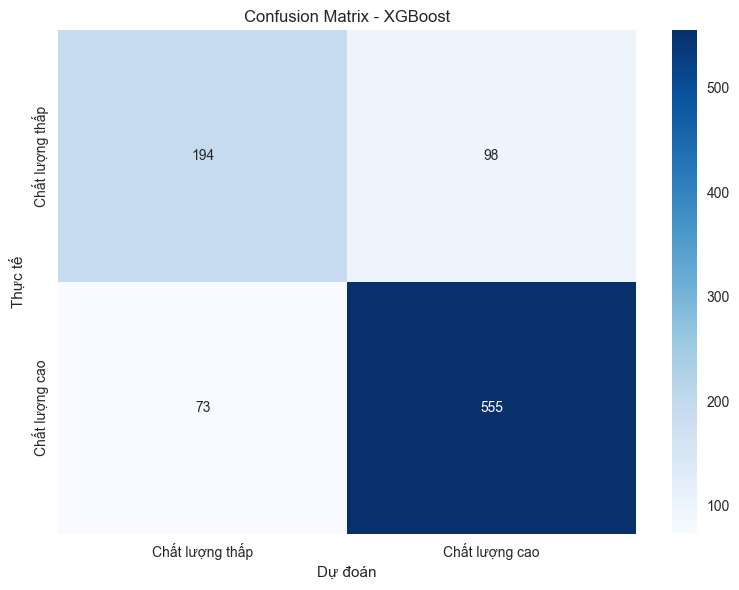

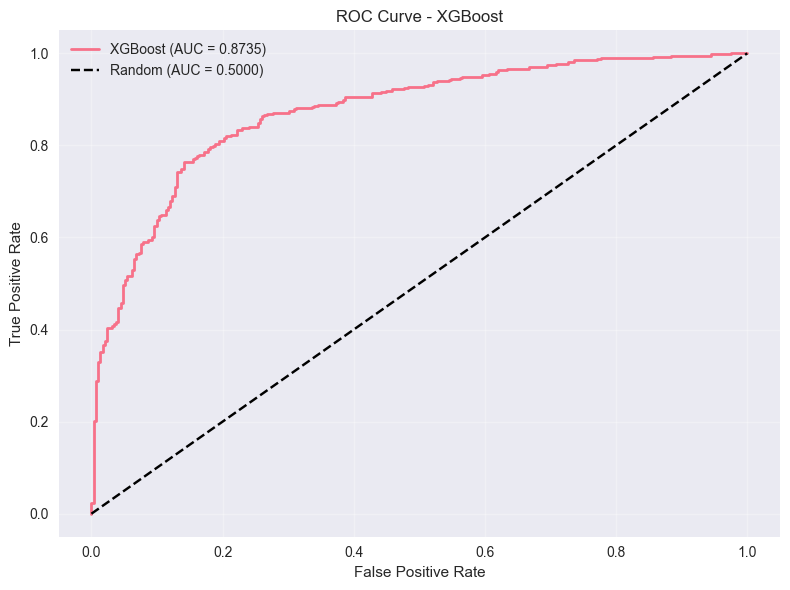

In [ ]:
print("=== XGBOOST ===")
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_results = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 'XGBoost')

print(f"Train Accuracy: {xgb_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {xgb_results['test_accuracy']:.4f}")
print(f"Precision: {xgb_results['precision']:.4f}")
print(f"Recall: {xgb_results['recall']:.4f}")
print(f"F1-Score: {xgb_results['f1_score']:.4f}")
print(f"ROC AUC: {xgb_results['roc_auc']:.4f}")

plot_confusion_matrix(xgb_results['confusion_matrix'], 'XGBoost')
plot_roc_curve(y_test, xgb_results['y_test_proba'], 'XGBoost', xgb_results['roc_auc'])


### 5.6. So sánh hiệu suất các mô hình


=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===
              Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  ROC AUC
Logistic Regression        0.745375       0.742391   0.773427 0.880573  0.823529 0.791467
      Decision Tree        0.892818       0.754348   0.812112 0.832803  0.822327 0.777626
           LightGBM        0.961643       0.821739   0.859133 0.883758  0.871272 0.879324
            XGBoost        0.993743       0.814130   0.849923 0.883758  0.866511 0.873484


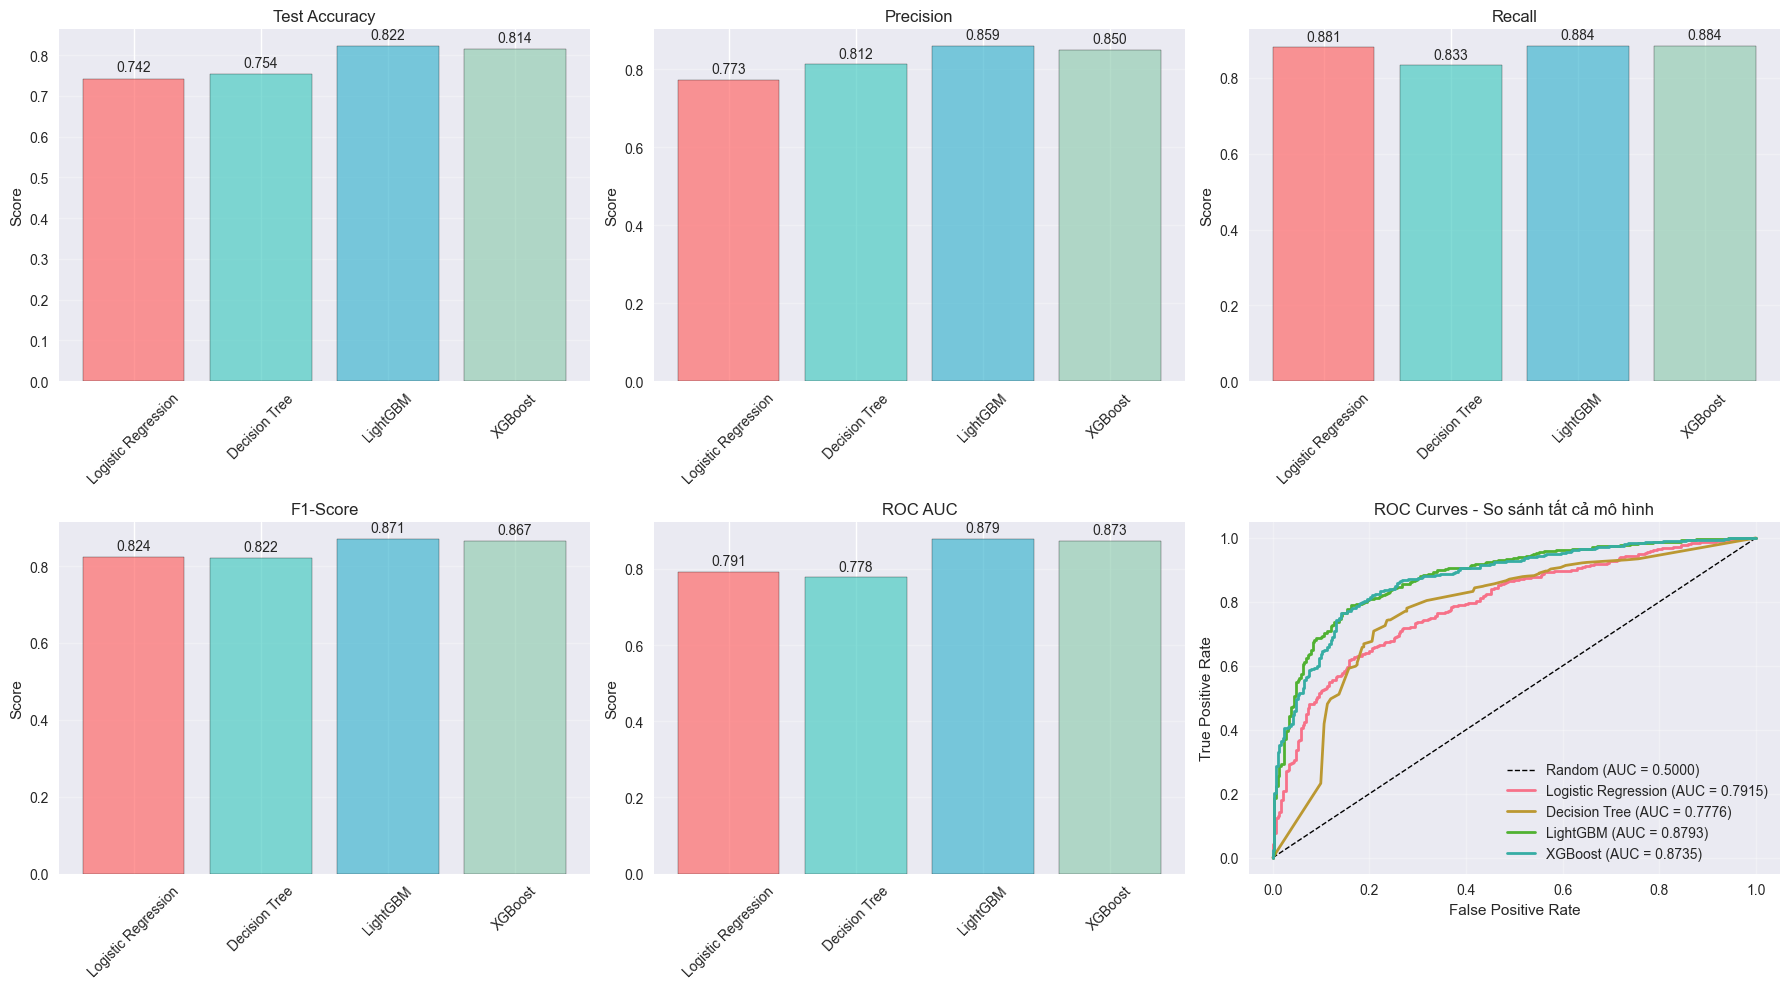


✓ Mô hình tốt nhất (theo Test Accuracy): LightGBM
  Test Accuracy: 0.8217


In [ ]:
# Tổng hợp kết quả
all_results = [lr_results, dt_results, lgb_results, xgb_results]

comparison_df = pd.DataFrame({
    'Model': [r['model_name'] for r in all_results],
    'Train Accuracy': [r['train_accuracy'] for r in all_results],
    'Test Accuracy': [r['test_accuracy'] for r in all_results],
    'Precision': [r['precision'] for r in all_results],
    'Recall': [r['recall'] for r in all_results],
    'F1-Score': [r['f1_score'] for r in all_results],
    'ROC AUC': [r['roc_auc'] if r['roc_auc'] else 0 for r in all_results]
})

print("=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===")
print(comparison_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3, axis='y')

    # Thêm giá trị trên mỗi cột
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Vẽ ROC curves cho tất cả mô hình
axes[5].plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)', linewidth=1)
for result in all_results:
    if result['y_test_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_test_proba'])
        axes[5].plot(fpr, tpr, label=f"{result['model_name']} (AUC = {result['roc_auc']:.4f})", linewidth=2)
axes[5].set_xlabel('False Positive Rate')
axes[5].set_ylabel('True Positive Rate')
axes[5].set_title('ROC Curves - So sánh tất cả mô hình')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tìm mô hình tốt nhất
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\n✓ Mô hình tốt nhất (theo Test Accuracy): {best_model}")
print(f"  Test Accuracy: {comparison_df.loc[best_model_idx, 'Test Accuracy']:.4f}")


## 6. Phân tích Feature Importance


### 6.1. Feature Importance - XGBoost


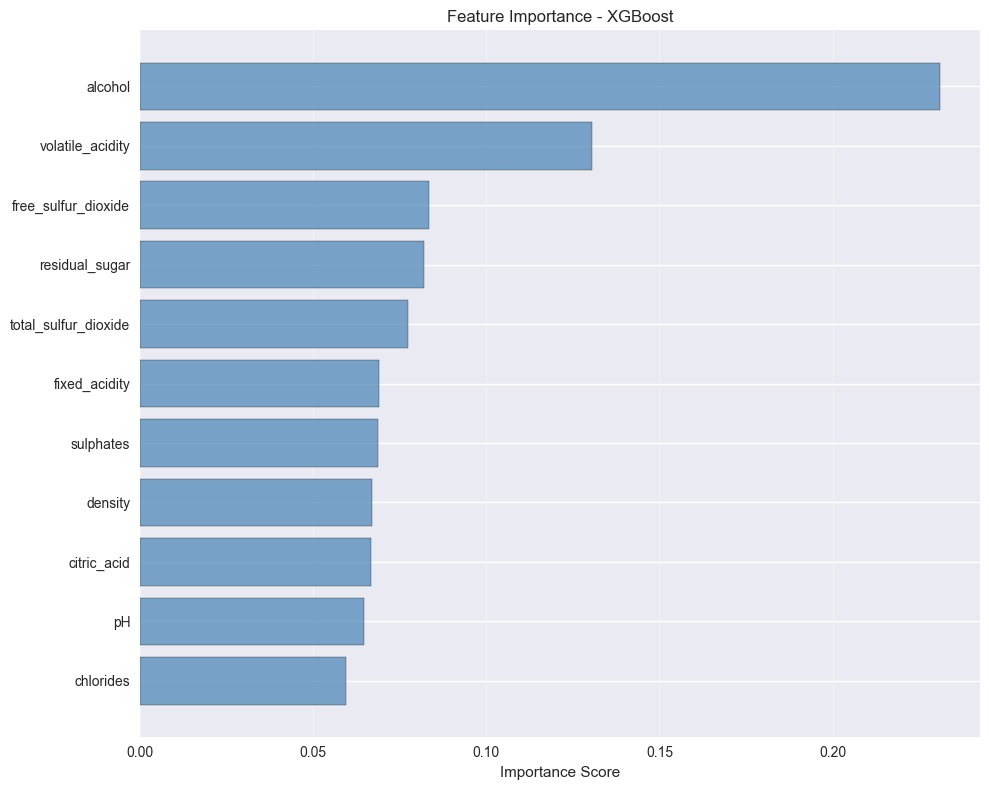

=== TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (XGBoost) ===
             Feature  Importance
             alcohol    0.231022
    volatile_acidity    0.130474
 free_sulfur_dioxide    0.083319
      residual_sugar    0.082148
total_sulfur_dioxide    0.077500


In [ ]:
xgb_importance = xgb_model.feature_importances_
xgb_feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(xgb_feature_imp_df['Feature'], xgb_feature_imp_df['Importance'],
        color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Importance Score')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("=== TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (XGBoost) ===")
print(xgb_feature_imp_df.head().to_string(index=False))


### 6.2. Feature Importance - LightGBM


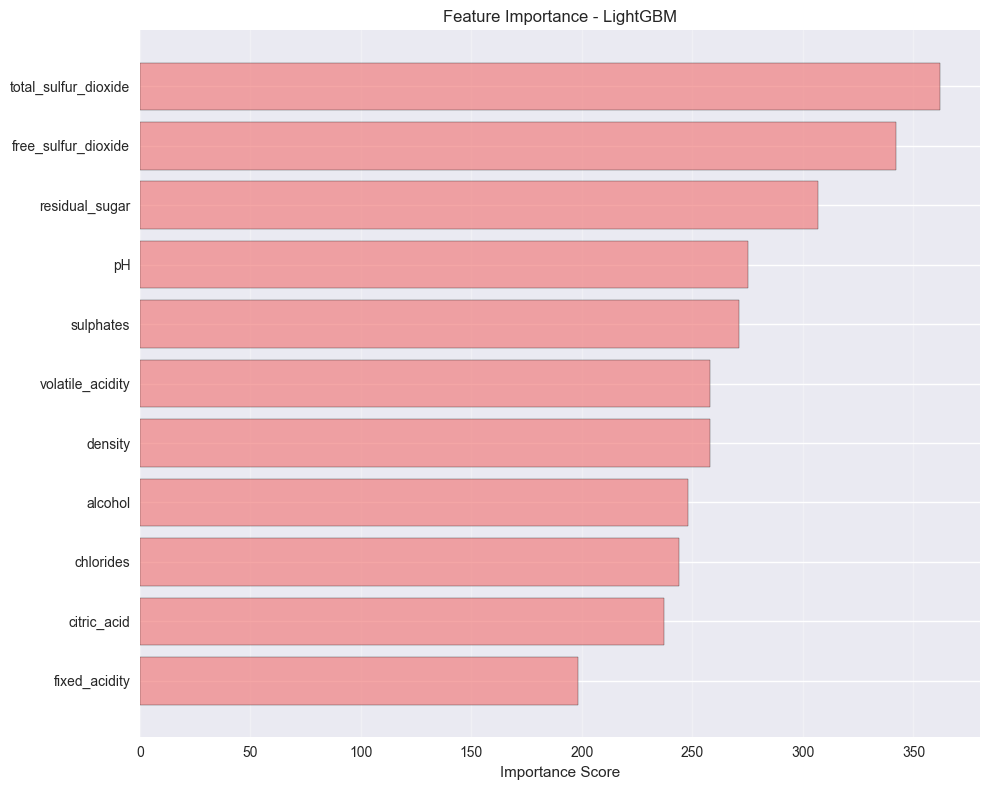

=== TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (LightGBM) ===
             Feature  Importance
total_sulfur_dioxide         362
 free_sulfur_dioxide         342
      residual_sugar         307
                  pH         275
           sulphates         271


In [ ]:
lgb_importance = lgb_model.feature_importances_
# Chuẩn hóa feature importance về tỷ lệ (0-1) để so sánh với XGBoost
lgb_importance_normalized = lgb_importance / lgb_importance.sum()
lgb_feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lgb_importance_normalized
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(lgb_feature_imp_df['Feature'], lgb_feature_imp_df['Importance'],
        color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Importance Score')
plt.title('Feature Importance - LightGBM')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("=== TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (LightGBM) ===")
print(lgb_feature_imp_df.head().to_string(index=False))


### 6.3. So sánh Feature Importance giữa XGBoost và LightGBM


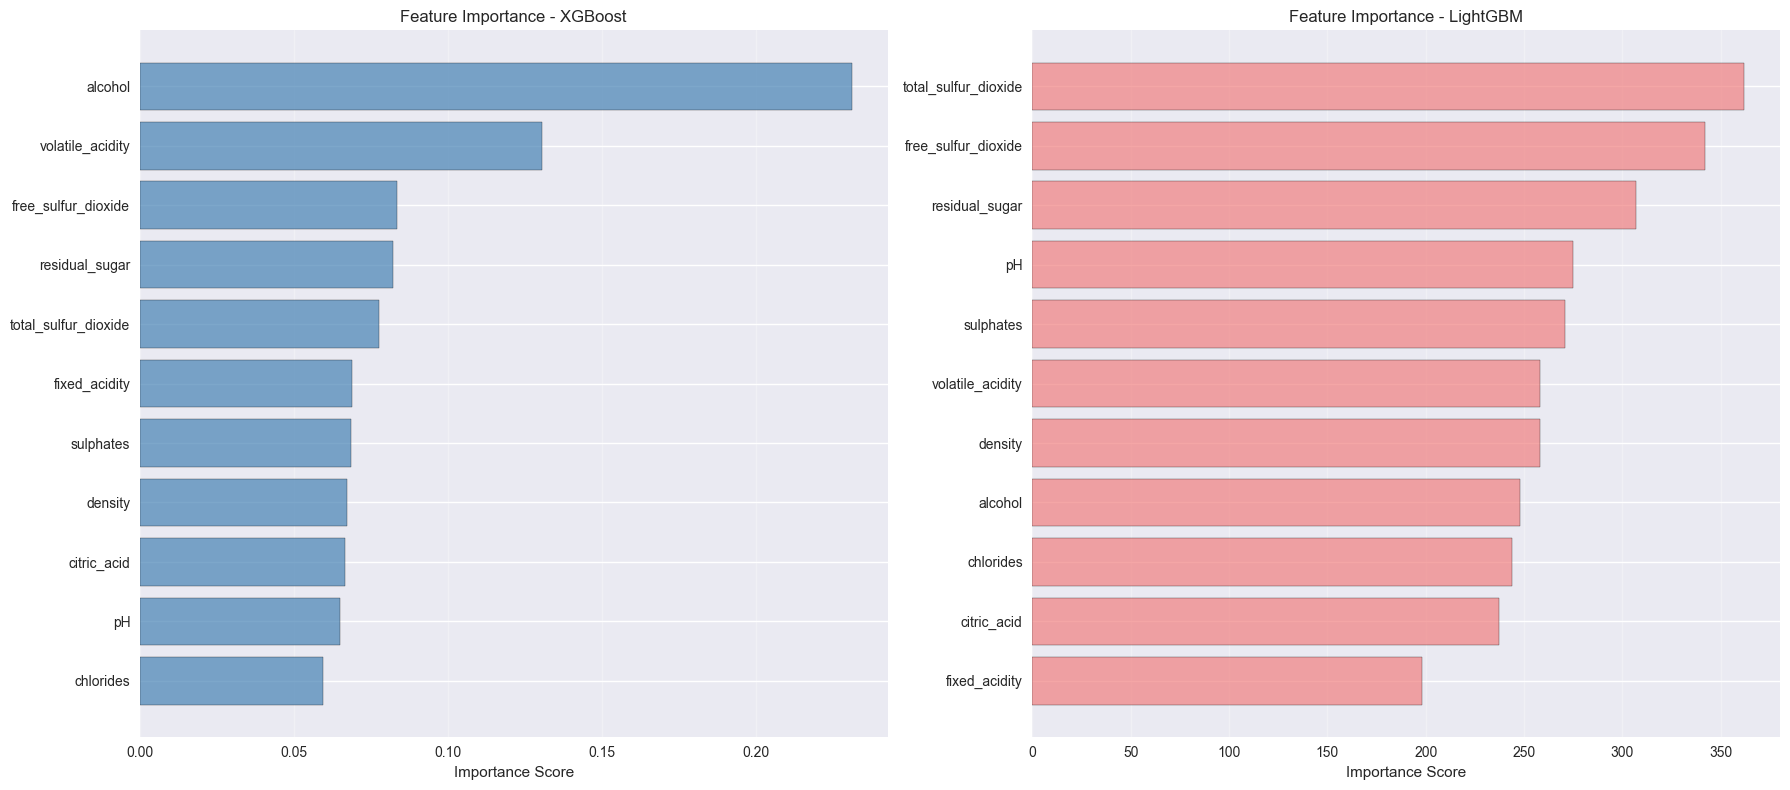

=== NHẬN XÉT ===

Các đặc trưng quan trọng nhất thường là:
- alcohol: Nồng độ cồn ảnh hưởng trực tiếp đến chất lượng rượu
- volatile acidity: Axit dễ bay hơi, nếu quá cao sẽ làm rượu có mùi khó chịu
- sulphates: Sulfat giúp bảo quản rượu, ảnh hưởng đến chất lượng
- total sulfur dioxide: Tổng lượng SO2, ảnh hưởng đến hương vị
- density: Mật độ rượu, liên quan đến nồng độ cồn và đường


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# XGBoost
axes[0].barh(xgb_feature_imp_df['Feature'], xgb_feature_imp_df['Importance'],
           color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Feature Importance - XGBoost')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# LightGBM
axes[1].barh(lgb_feature_imp_df['Feature'], lgb_feature_imp_df['Importance'],
           color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Importance Score')
axes[1].set_title('Feature Importance - LightGBM')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("=== NHẬN XÉT ===")
print("\nCác đặc trưng quan trọng nhất thường là:")
print("- alcohol: Nồng độ cồn ảnh hưởng trực tiếp đến chất lượng rượu")
print("- volatile acidity: Axit dễ bay hơi, nếu quá cao sẽ làm rượu có mùi khó chịu")
print("- sulphates: Sulfat giúp bảo quản rượu, ảnh hưởng đến chất lượng")
print("- total sulfur dioxide: Tổng lượng SO2, ảnh hưởng đến hương vị")
print("- density: Mật độ rượu, liên quan đến nồng độ cồn và đường")


## 7. Thực nghiệm với nhiều tỷ lệ train/test


=== THỰC NGHIỆM VỚI NHIỀU TỶ LỆ TRAIN/TEST ===

--- Test Size = 0.1 ---
Accuracy: 0.8391
F1-Score: 0.8829

--- Test Size = 0.2 ---
Accuracy: 0.8217
F1-Score: 0.8713

--- Test Size = 0.3 ---
Accuracy: 0.8158
F1-Score: 0.8678


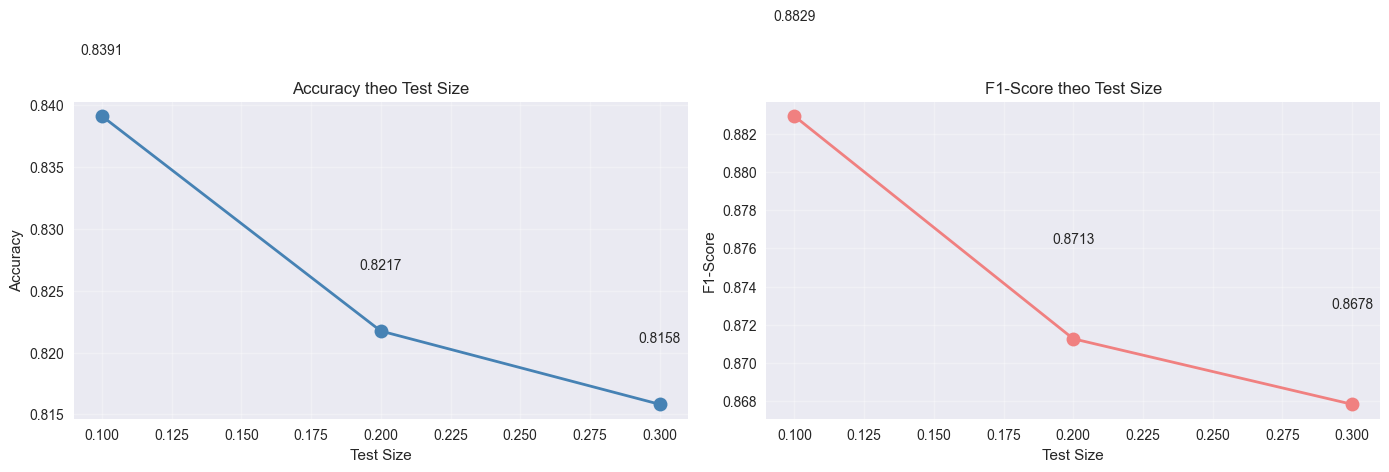

In [ ]:
print("=== THỰC NGHIỆM VỚI NHIỀU TỶ LỆ TRAIN/TEST ===")

test_size_results = {}

for test_size in test_sizes:
    print(f"\n--- Test Size = {test_size} ---")

    X_train_ts = datasets[test_size]['X_train']
    X_test_ts = datasets[test_size]['X_test']
    y_train_ts = datasets[test_size]['y_train']
    y_test_ts = datasets[test_size]['y_test']

    # Test với LightGBM (mô hình tốt nhất)
    lgb_model_ts = lgb.LGBMClassifier(random_state=42, verbose=-1)
    lgb_model_ts.fit(X_train_ts, y_train_ts)
    y_pred_ts = lgb_model_ts.predict(X_test_ts)

    accuracy = accuracy_score(y_test_ts, y_pred_ts)
    f1 = f1_score(y_test_ts, y_pred_ts)

    test_size_results[test_size] = {
        'accuracy': accuracy,
        'f1_score': f1
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Vẽ biểu đồ so sánh
test_sizes_list = list(test_size_results.keys())
accuracies = [test_size_results[ts]['accuracy'] for ts in test_sizes_list]
f1_scores = [test_size_results[ts]['f1_score'] for ts in test_sizes_list]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(test_sizes_list, accuracies, marker='o', linewidth=2, markersize=10, color='steelblue')
axes[0].set_xlabel('Test Size')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy theo Test Size')
axes[0].grid(True, alpha=0.3)
for i, acc in enumerate(accuracies):
    axes[0].text(test_sizes_list[i], acc + 0.005, f'{acc:.4f}', ha='center')

axes[1].plot(test_sizes_list, f1_scores, marker='o', linewidth=2, markersize=10, color='lightcoral')
axes[1].set_xlabel('Test Size')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score theo Test Size')
axes[1].grid(True, alpha=0.3)
for i, f1 in enumerate(f1_scores):
    axes[1].text(test_sizes_list[i], f1 + 0.005, f'{f1:.4f}', ha='center')

plt.tight_layout()
plt.show()

## 8. Kết luận và Nhận xét


## 9. Thực nghiệm mở rộng

### 9.1. So sánh hiệu suất giữa Wine đỏ và Wine trắng

=== SO SÁNH HIỆU SUẤT GIỮA WINE ĐỎ VÀ WINE TRẮNG ===

Wine đỏ - Train: 286, Test: 72
Wine trắng - Train: 3390, Test: 848

--- ĐÁNH GIÁ TRÊN WINE ĐỎ ---
Logistic Regression: Accuracy=0.6667, F1=0.7391
Decision Tree: Accuracy=0.7222, F1=0.7727
LightGBM: Accuracy=0.7500, F1=0.7857
XGBoost: Accuracy=0.7778, F1=0.8095

--- ĐÁNH GIÁ TRÊN WINE TRẮNG ---
Logistic Regression: Accuracy=0.7441, F1=0.8271
Decision Tree: Accuracy=0.7653, F1=0.8277
LightGBM: Accuracy=0.8231, F1=0.8746
XGBoost: Accuracy=0.8101, F1=0.8653

=== BẢNG SO SÁNH ===
              Model  Red Wine - Accuracy  Red Wine - F1  White Wine - Accuracy  White Wine - F1
Logistic Regression             0.666667       0.739130               0.744104         0.827092
      Decision Tree             0.722222       0.772727               0.765330         0.827706
           LightGBM             0.750000       0.785714               0.823113         0.874582
            XGBoost             0.777778       0.809524               0.810142    

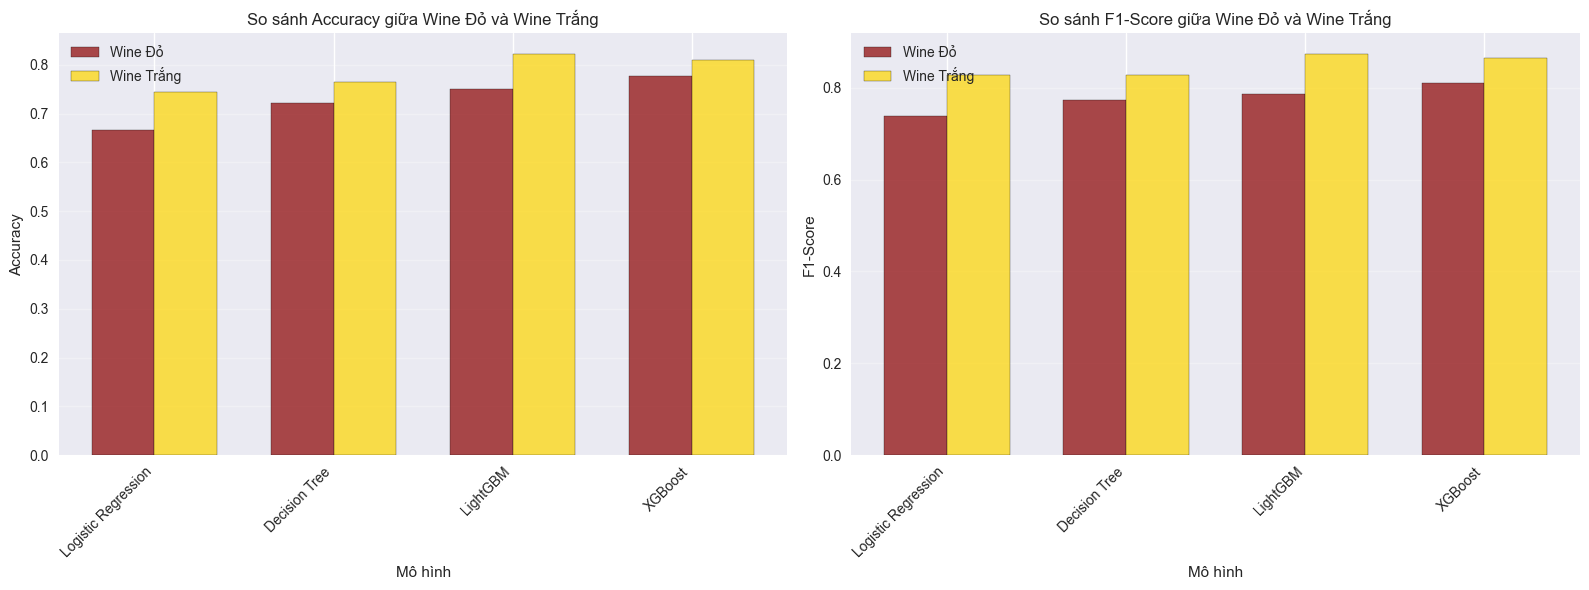


=== NHẬN XÉT ===
Mô hình tốt nhất cho Wine Đỏ: XGBoost
Mô hình tốt nhất cho Wine Trắng: LightGBM


In [ ]:
print("=== SO SÁNH HIỆU SUẤT GIỮA WINE ĐỎ VÀ WINE TRẮNG ===\n")

# Chuẩn bị dữ liệu cho wine đỏ và wine trắng riêng biệt
df_red_processed = df_processed[df_processed['wine_type'] == 'red'].copy()
df_white_processed = df_processed[df_processed['wine_type'] == 'white'].copy()

# Tạo nhãn binary cho từng loại
df_red_processed['quality_binary'] = (df_red_processed['quality'] >= 6).astype(int)
df_white_processed['quality_binary'] = (df_white_processed['quality'] >= 6).astype(int)

# Chuẩn bị features
feature_cols_red = [col for col in feature_cols if col in df_red_processed.columns]
feature_cols_white = [col for col in feature_cols if col in df_white_processed.columns]

# Xử lý dữ liệu wine đỏ
X_red = df_red_processed[feature_cols_red].copy()
y_red = df_red_processed['quality_binary'].copy()
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_red, y_red, test_size=0.2, random_state=42, stratify=y_red
)
scaler_red = StandardScaler()
X_red_train_scaled = scaler_red.fit_transform(X_red_train)
X_red_test_scaled = scaler_red.transform(X_red_test)

# Xử lý dữ liệu wine trắng
X_white = df_white_processed[feature_cols_white].copy()
y_white = df_white_processed['quality_binary'].copy()
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(
    X_white, y_white, test_size=0.2, random_state=42, stratify=y_white
)
scaler_white = StandardScaler()
X_white_train_scaled = scaler_white.fit_transform(X_white_train)
X_white_test_scaled = scaler_white.transform(X_white_test)

print(f"Wine đỏ - Train: {len(X_red_train_scaled)}, Test: {len(X_red_test_scaled)}")
print(f"Wine trắng - Train: {len(X_white_train_scaled)}, Test: {len(X_white_test_scaled)}\n")

# Đánh giá các mô hình trên từng loại wine
models_to_compare = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

results_red = {}
results_white = {}

print("--- ĐÁNH GIÁ TRÊN WINE ĐỎ ---")
for name, model in models_to_compare.items():
    model.fit(X_red_train_scaled, y_red_train)
    y_pred = model.predict(X_red_test_scaled)
    y_proba = model.predict_proba(X_red_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    results_red[name] = {
        'accuracy': accuracy_score(y_red_test, y_pred),
        'precision': precision_score(y_red_test, y_pred),
        'recall': recall_score(y_red_test, y_pred),
        'f1': f1_score(y_red_test, y_pred),
        'roc_auc': roc_auc_score(y_red_test, y_proba) if y_proba is not None else None
    }
    print(f"{name}: Accuracy={results_red[name]['accuracy']:.4f}, F1={results_red[name]['f1']:.4f}")

print("\n--- ĐÁNH GIÁ TRÊN WINE TRẮNG ---")
for name, model in models_to_compare.items():
    model.fit(X_white_train_scaled, y_white_train)
    y_pred = model.predict(X_white_test_scaled)
    y_proba = model.predict_proba(X_white_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    results_white[name] = {
        'accuracy': accuracy_score(y_white_test, y_pred),
        'precision': precision_score(y_white_test, y_pred),
        'recall': recall_score(y_white_test, y_pred),
        'f1': f1_score(y_white_test, y_pred),
        'roc_auc': roc_auc_score(y_white_test, y_proba) if y_proba is not None else None
    }
    print(f"{name}: Accuracy={results_white[name]['accuracy']:.4f}, F1={results_white[name]['f1']:.4f}")

# Tạo bảng so sánh
comparison_wine_df = pd.DataFrame({
    'Model': list(models_to_compare.keys()),
    'Red Wine - Accuracy': [results_red[m]['accuracy'] for m in models_to_compare.keys()],
    'Red Wine - F1': [results_red[m]['f1'] for m in models_to_compare.keys()],
    'White Wine - Accuracy': [results_white[m]['accuracy'] for m in models_to_compare.keys()],
    'White Wine - F1': [results_white[m]['f1'] for m in models_to_compare.keys()],
})

print("\n=== BẢNG SO SÁNH ===")
print(comparison_wine_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(models_to_compare.keys()))
width = 0.35

axes[0].bar(x - width/2, comparison_wine_df['Red Wine - Accuracy'], width,
           label='Wine Đỏ', color='#8B0000', alpha=0.7, edgecolor='black')
axes[0].bar(x + width/2, comparison_wine_df['White Wine - Accuracy'], width,
           label='Wine Trắng', color='#FFD700', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Mô hình')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('So sánh Accuracy giữa Wine Đỏ và Wine Trắng')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_to_compare.keys(), rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x - width/2, comparison_wine_df['Red Wine - F1'], width,
           label='Wine Đỏ', color='#8B0000', alpha=0.7, edgecolor='black')
axes[1].bar(x + width/2, comparison_wine_df['White Wine - F1'], width,
           label='Wine Trắng', color='#FFD700', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Mô hình')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('So sánh F1-Score giữa Wine Đỏ và Wine Trắng')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_to_compare.keys(), rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n=== NHẬN XÉT ===")
best_red = comparison_wine_df.loc[comparison_wine_df['Red Wine - Accuracy'].idxmax(), 'Model']
best_white = comparison_wine_df.loc[comparison_wine_df['White Wine - Accuracy'].idxmax(), 'Model']
print(f"Mô hình tốt nhất cho Wine Đỏ: {best_red}")
print(f"Mô hình tốt nhất cho Wine Trắng: {best_white}")

### 9.2. Dự đoán quality theo dạng regression

=== DỰ ĐOÁN QUALITY THEO DẠNG REGRESSION ===

Train: 3676, Test: 920
Quality range: 3 - 9

--- ĐÁNH GIÁ CÁC MÔ HÌNH REGRESSION ---

Linear Regression:
  Test RMSE: 0.7227
  Test MAE: 0.5699
  Test R²: 0.2589

Ridge Regression:
  Test RMSE: 0.7227
  Test MAE: 0.5699
  Test R²: 0.2589

Lasso Regression:
  Test RMSE: 0.8415
  Test MAE: 0.6298
  Test R²: -0.0048

Decision Tree Regressor:
  Test RMSE: 0.7795
  Test MAE: 0.5300
  Test R²: 0.1377

XGBoost Regressor:
  Test RMSE: 0.6156
  Test MAE: 0.4441
  Test R²: 0.4623

LightGBM Regressor:
  Test RMSE: 0.6287
  Test MAE: 0.4807
  Test R²: 0.4391

=== BẢNG SO SÁNH CÁC MÔ HÌNH REGRESSION ===
                  Model  Test RMSE  Test MAE   Test R²
      Linear Regression   0.722687  0.569938  0.258894
       Ridge Regression   0.722681  0.569943  0.258907
       Lasso Regression   0.841486  0.629803 -0.004786
Decision Tree Regressor   0.779522  0.529959  0.137744
      XGBoost Regressor   0.615600  0.444125  0.462255
     LightGBM Regressor   

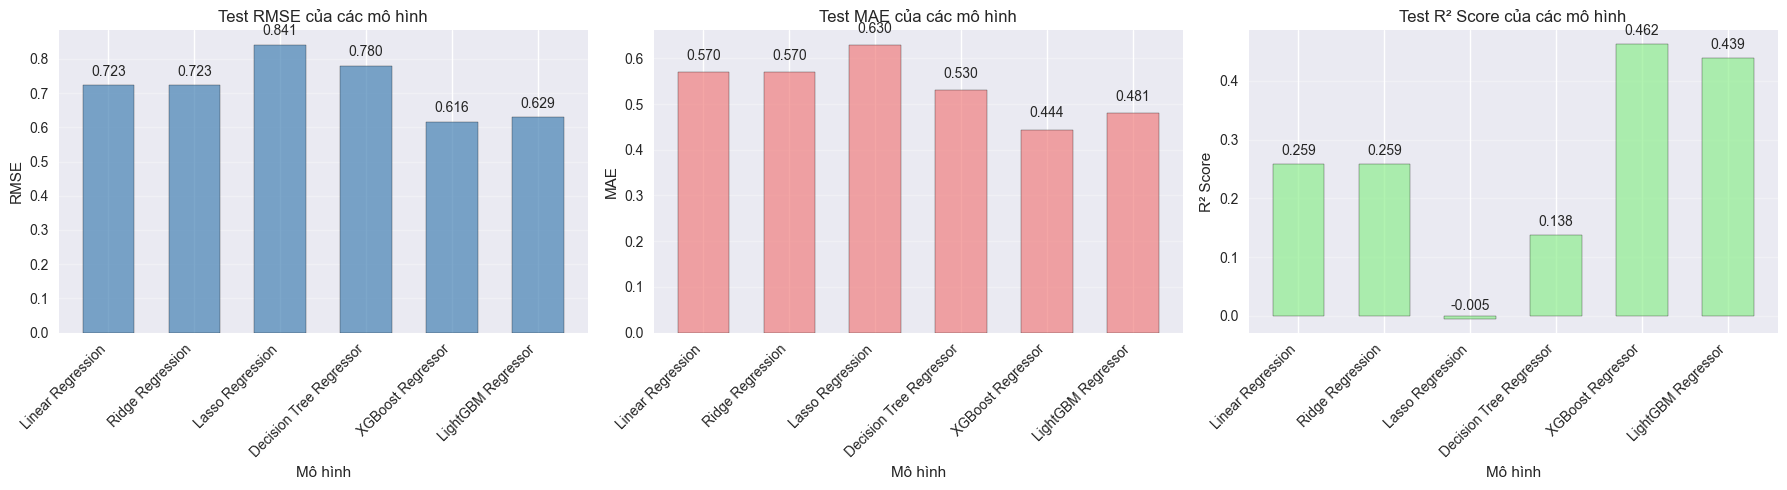

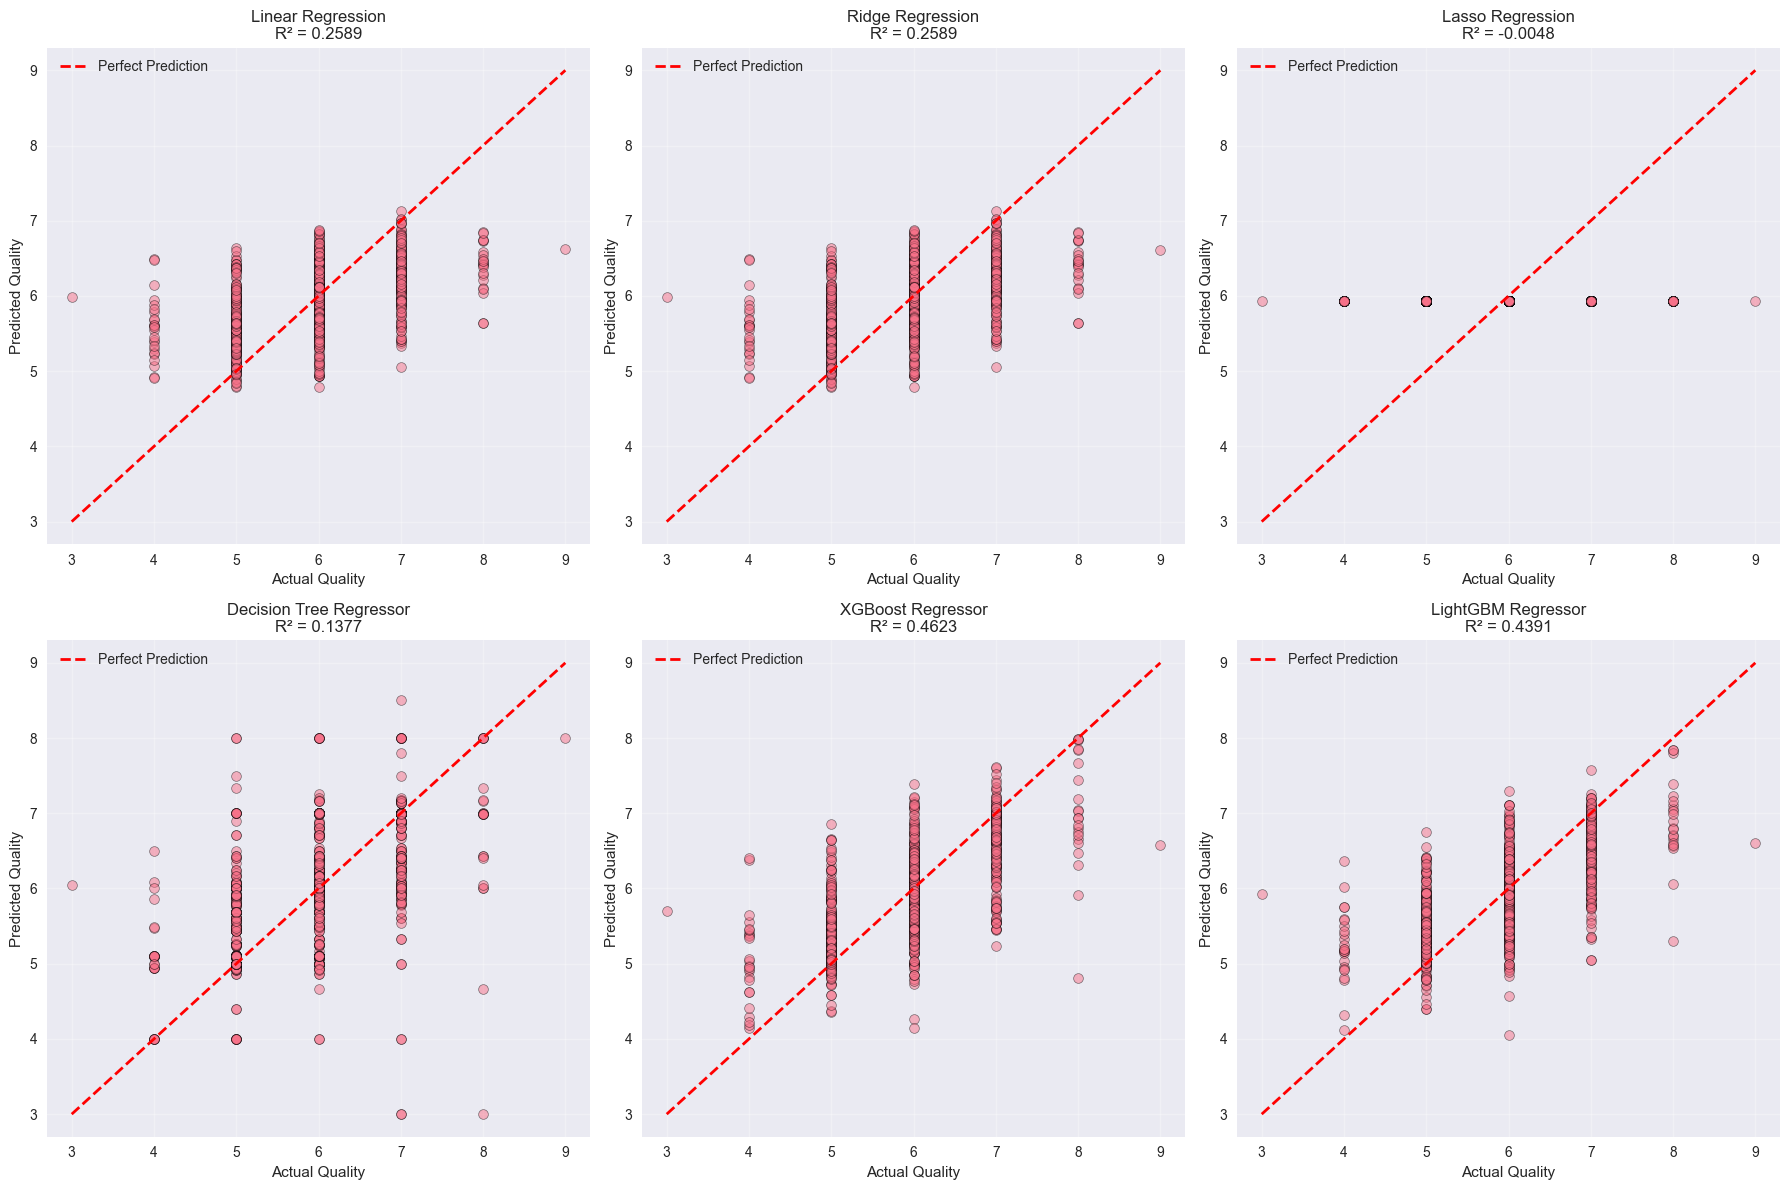


=== MÔ HÌNH TỐT NHẤT (theo R² Score) ===
XGBoost Regressor: R² = 0.4623


In [ ]:
print("=== DỰ ĐOÁN QUALITY THEO DẠNG REGRESSION ===\n")

# Sử dụng dữ liệu đã xử lý outliers
X_reg = df_processed[feature_cols].copy()
y_reg = df_processed['quality'].copy()  # Sử dụng quality gốc (3-9) thay vì binary

# Chia train/test
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Chuẩn hóa dữ liệu
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

print(f"Train: {len(X_reg_train_scaled)}, Test: {len(X_reg_test_scaled)}")
print(f"Quality range: {y_reg.min()} - {y_reg.max()}\n")

# Các mô hình regression
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=10),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42),
    'LightGBM Regressor': lgb.LGBMRegressor(random_state=42, verbose=-1)
}

regression_results = {}

print("--- ĐÁNH GIÁ CÁC MÔ HÌNH REGRESSION ---")
for name, model in regression_models.items():
    # Train
    model.fit(X_reg_train_scaled, y_reg_train)

    # Predict
    y_train_pred = model.predict(X_reg_train_scaled)
    y_test_pred = model.predict(X_reg_test_scaled)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_reg_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_reg_test, y_test_pred))
    train_mae = mean_absolute_error(y_reg_train, y_train_pred)
    test_mae = mean_absolute_error(y_reg_test, y_test_pred)
    train_r2 = r2_score(y_reg_train, y_train_pred)
    test_r2 = r2_score(y_reg_test, y_test_pred)

    regression_results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }

    print(f"\n{name}:")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")
    print(f"  Test R²: {test_r2:.4f}")

# Tạo bảng so sánh
regression_comparison = pd.DataFrame({
    'Model': list(regression_models.keys()),
    'Test RMSE': [regression_results[m]['test_rmse'] for m in regression_models.keys()],
    'Test MAE': [regression_results[m]['test_mae'] for m in regression_models.keys()],
    'Test R²': [regression_results[m]['test_r2'] for m in regression_models.keys()]
})

print("\n=== BẢNG SO SÁNH CÁC MÔ HÌNH REGRESSION ===")
print(regression_comparison.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x = np.arange(len(regression_models.keys()))
width = 0.6

axes[0].bar(x, regression_comparison['Test RMSE'], width, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Mô hình')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Test RMSE của các mô hình')
axes[0].set_xticks(x)
axes[0].set_xticklabels(regression_models.keys(), rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(regression_comparison['Test RMSE']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

axes[1].bar(x, regression_comparison['Test MAE'], width, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Mô hình')
axes[1].set_ylabel('MAE')
axes[1].set_title('Test MAE của các mô hình')
axes[1].set_xticks(x)
axes[1].set_xticklabels(regression_models.keys(), rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(regression_comparison['Test MAE']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

axes[2].bar(x, regression_comparison['Test R²'], width, color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Mô hình')
axes[2].set_ylabel('R² Score')
axes[2].set_title('Test R² Score của các mô hình')
axes[2].set_xticks(x)
axes[2].set_xticklabels(regression_models.keys(), rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(regression_comparison['Test R²']):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Vẽ scatter plot: Actual vs Predicted cho mô hình tốt nhất
best_reg_model = regression_comparison.loc[regression_comparison['Test R²'].idxmax(), 'Model']
best_pred = regression_results[best_reg_model]['y_test_pred']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, result) in enumerate(regression_results.items()):
    if idx < len(axes):
        axes[idx].scatter(y_reg_test, result['y_test_pred'], alpha=0.5, edgecolors='black', linewidth=0.5)
        axes[idx].plot([y_reg_test.min(), y_reg_test.max()],
                      [y_reg_test.min(), y_reg_test.max()],
                      'r--', lw=2, label='Perfect Prediction')
        axes[idx].set_xlabel('Actual Quality')
        axes[idx].set_ylabel('Predicted Quality')
        axes[idx].set_title(f'{name}\nR² = {result["test_r2"]:.4f}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== MÔ HÌNH TỐT NHẤT (theo R² Score) ===")
print(f"{best_reg_model}: R² = {regression_comparison.loc[regression_comparison['Test R²'].idxmax(), 'Test R²']:.4f}")

### 9.3. Hyperparameter tuning (GridSearchCV)

=== HYPERPARAMETER TUNING VỚI GRIDSEARCHCV ===

Sử dụng dữ liệu với 3676 mẫu train và 920 mẫu test

--- 1. TUNING LOGISTIC REGRESSION ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV score: 0.8274
Test Accuracy: 0.7359
Test F1: 0.8199
Test ROC AUC: 0.7906

--- 2. TUNING DECISION TREE ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.8294
Test Accuracy: 0.7717
Test F1: 0.8333
Test ROC AUC: 0.7545

--- 3. TUNING LIGHTGBM ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 31}
Best CV score: 0.8700
Test Accuracy: 0.8228
Test F1: 0.8720
Test ROC AUC: 0.8826

--- 4. TUNING XGBOOST ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'le

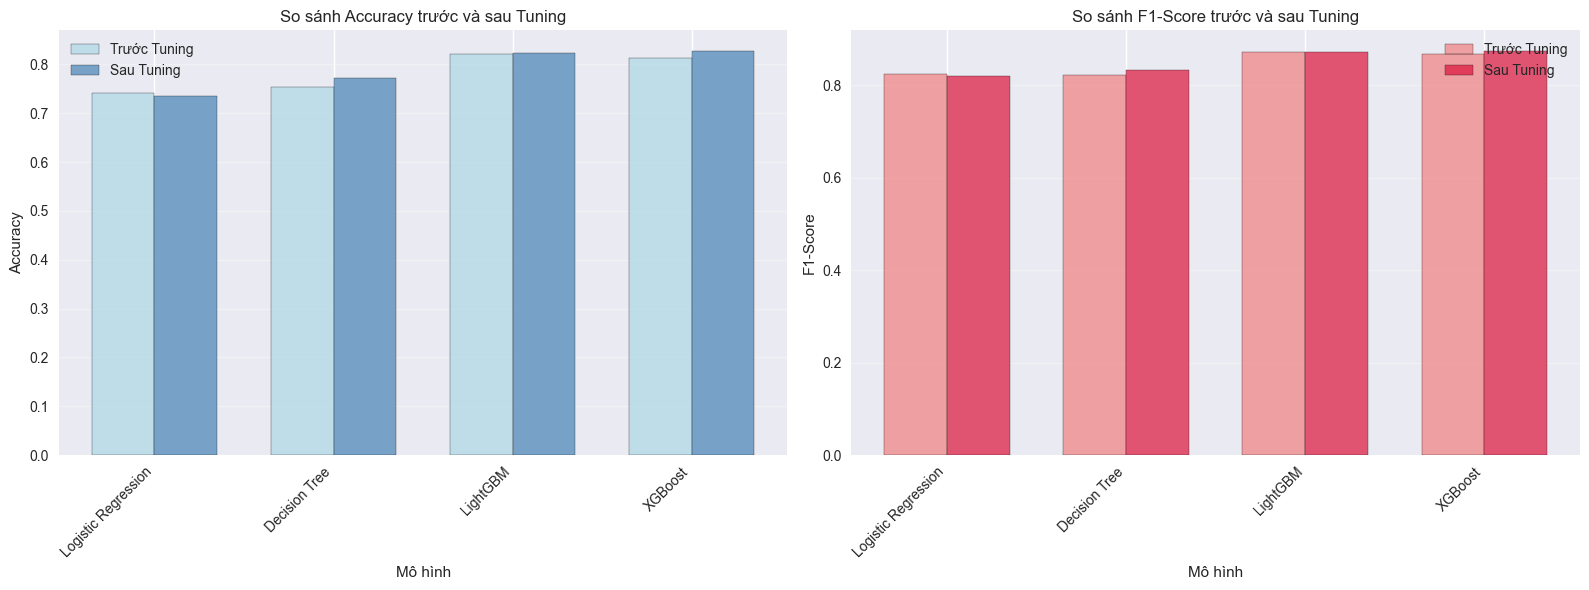


=== KẾT LUẬN ===
Mô hình có cải thiện Accuracy nhiều nhất: Decision Tree (+0.0174)
Mô hình có cải thiện F1 nhiều nhất: Decision Tree (+0.0110)


In [ ]:
print("=== HYPERPARAMETER TUNING VỚI GRIDSEARCHCV ===\n")

# Sử dụng dữ liệu đã chuẩn hóa từ phần trước (X_train, X_test, y_train, y_test)
print(f"Sử dụng dữ liệu với {len(X_train)} mẫu train và {len(X_test)} mẫu test\n")

# 1. Tuning cho Logistic Regression
print("--- 1. TUNING LOGISTIC REGRESSION ---")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_base = LogisticRegression(random_state=42, max_iter=1000)
grid_lr = GridSearchCV(lr_base, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

print(f"Best parameters: {grid_lr.best_params_}")
print(f"Best CV score: {grid_lr.best_score_:.4f}")

lr_tuned = grid_lr.best_estimator_
lr_tuned_pred = lr_tuned.predict(X_test)
lr_tuned_proba = lr_tuned.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, lr_tuned_pred):.4f}")
print(f"Test F1: {f1_score(y_test, lr_tuned_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, lr_tuned_proba):.4f}\n")

# 2. Tuning cho Decision Tree
print("--- 2. TUNING DECISION TREE ---")
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_base = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt_base, param_grid_dt, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)

print(f"Best parameters: {grid_dt.best_params_}")
print(f"Best CV score: {grid_dt.best_score_:.4f}")

dt_tuned = grid_dt.best_estimator_
dt_tuned_pred = dt_tuned.predict(X_test)
dt_tuned_proba = dt_tuned.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, dt_tuned_pred):.4f}")
print(f"Test F1: {f1_score(y_test, dt_tuned_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, dt_tuned_proba):.4f}\n")

# 3. Tuning cho LightGBM
print("--- 3. TUNING LIGHTGBM ---")
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

lgb_base = lgb.LGBMClassifier(random_state=42, verbose=-1)
grid_lgb = GridSearchCV(lgb_base, param_grid_lgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_lgb.fit(X_train, y_train)

print(f"Best parameters: {grid_lgb.best_params_}")
print(f"Best CV score: {grid_lgb.best_score_:.4f}")

lgb_tuned = grid_lgb.best_estimator_
lgb_tuned_pred = lgb_tuned.predict(X_test)
lgb_tuned_proba = lgb_tuned.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, lgb_tuned_pred):.4f}")
print(f"Test F1: {f1_score(y_test, lgb_tuned_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, lgb_tuned_proba):.4f}\n")

# 4. Tuning cho XGBoost
print("--- 4. TUNING XGBOOST ---")
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_base = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb_base, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print(f"Best parameters: {grid_xgb.best_params_}")
print(f"Best CV score: {grid_xgb.best_score_:.4f}")

xgb_tuned = grid_xgb.best_estimator_
xgb_tuned_pred = xgb_tuned.predict(X_test)
xgb_tuned_proba = xgb_tuned.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, xgb_tuned_pred):.4f}")
print(f"Test F1: {f1_score(y_test, xgb_tuned_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, xgb_tuned_proba):.4f}\n")

# So sánh trước và sau tuning
print("=== SO SÁNH TRƯỚC VÀ SAU TUNING ===")

comparison_tuning = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'LightGBM', 'XGBoost'],
    'Before Tuning - Accuracy': [
        lr_results['test_accuracy'],
        dt_results['test_accuracy'],
        lgb_results['test_accuracy'],
        xgb_results['test_accuracy']
    ],
    'After Tuning - Accuracy': [
        accuracy_score(y_test, lr_tuned_pred),
        accuracy_score(y_test, dt_tuned_pred),
        accuracy_score(y_test, lgb_tuned_pred),
        accuracy_score(y_test, xgb_tuned_pred)
    ],
    'Before Tuning - F1': [
        lr_results['f1_score'],
        dt_results['f1_score'],
        lgb_results['f1_score'],
        xgb_results['f1_score']
    ],
    'After Tuning - F1': [
        f1_score(y_test, lr_tuned_pred),
        f1_score(y_test, dt_tuned_pred),
        f1_score(y_test, lgb_tuned_pred),
        f1_score(y_test, xgb_tuned_pred)
    ]
})

comparison_tuning['Accuracy Improvement'] = comparison_tuning['After Tuning - Accuracy'] - comparison_tuning['Before Tuning - Accuracy']
comparison_tuning['F1 Improvement'] = comparison_tuning['After Tuning - F1'] - comparison_tuning['Before Tuning - F1']

print(comparison_tuning.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(comparison_tuning['Model']))
width = 0.35

axes[0].bar(x - width/2, comparison_tuning['Before Tuning - Accuracy'], width,
           label='Trước Tuning', color='lightblue', alpha=0.7, edgecolor='black')
axes[0].bar(x + width/2, comparison_tuning['After Tuning - Accuracy'], width,
           label='Sau Tuning', color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Mô hình')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('So sánh Accuracy trước và sau Tuning')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_tuning['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x - width/2, comparison_tuning['Before Tuning - F1'], width,
           label='Trước Tuning', color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].bar(x + width/2, comparison_tuning['After Tuning - F1'], width,
           label='Sau Tuning', color='crimson', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Mô hình')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('So sánh F1-Score trước và sau Tuning')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_tuning['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n=== KẾT LUẬN ===")
best_improvement_acc = comparison_tuning.loc[comparison_tuning['Accuracy Improvement'].idxmax()]
best_improvement_f1 = comparison_tuning.loc[comparison_tuning['F1 Improvement'].idxmax()]
print(f"Mô hình có cải thiện Accuracy nhiều nhất: {best_improvement_acc['Model']} (+{best_improvement_acc['Accuracy Improvement']:.4f})")
print(f"Mô hình có cải thiện F1 nhiều nhất: {best_improvement_f1['Model']} (+{best_improvement_f1['F1 Improvement']:.4f})")

In [ ]:
print("=== KẾT LUẬN ===")
print("\n1. MÔ HÌNH TỐT NHẤT:")
best_idx = comparison_df['Test Accuracy'].idxmax()
print(f"   - {comparison_df.loc[best_idx, 'Model']} với Test Accuracy = {comparison_df.loc[best_idx, 'Test Accuracy']:.4f}")

print("\n2. SO SÁNH CÁC MÔ HÌNH:")
print("   - Logistic Regression: Mô hình baseline đơn giản, dễ hiểu nhưng hiệu suất thấp hơn")
print("   - Decision Tree: Dễ giải thích nhưng dễ overfitting")
print("   - LightGBM & XGBoost: Gradient boosting models cho hiệu suất cao nhất")
print("     → XGBoost và LightGBM thường tốt hơn vì:")
print("       + Sử dụng ensemble learning (kết hợp nhiều cây quyết định)")
print("       + Có khả năng xử lý non-linear relationships tốt")
print("       + Có built-in regularization để tránh overfitting")

print("\n3. ĐẶC TRƯNG QUAN TRỌNG:")
print("   - alcohol: Đặc trưng quan trọng nhất, ảnh hưởng trực tiếp đến chất lượng")
print("   - volatile acidity: Axit dễ bay hơi, nếu cao sẽ làm giảm chất lượng")
print("   - sulphates: Giúp bảo quản và ảnh hưởng đến hương vị")

print("\n4. HƯỚNG PHÁT TRIỂN:")
print("   - Hyperparameter tuning với GridSearchCV hoặc RandomizedSearchCV")
print("   - Xử lý mất cân bằng lớp bằng SMOTE hoặc class weights")
print("   - Thử nghiệm với các mô hình khác: Random Forest, SVM, Neural Networks")
print("   - So sánh riêng biệt giữa wine đỏ và wine trắng")
print("   - Thử nghiệm với bài toán regression để dự đoán điểm quality chính xác")


=== KẾT LUẬN ===

1. MÔ HÌNH TỐT NHẤT:
   - LightGBM với Test Accuracy = 0.8217

2. SO SÁNH CÁC MÔ HÌNH:
   - Logistic Regression: Mô hình baseline đơn giản, dễ hiểu nhưng hiệu suất thấp hơn
   - Decision Tree: Dễ giải thích nhưng dễ overfitting
   - LightGBM & XGBoost: Gradient boosting models cho hiệu suất cao nhất
     → XGBoost và LightGBM thường tốt hơn vì:
       + Sử dụng ensemble learning (kết hợp nhiều cây quyết định)
       + Có khả năng xử lý non-linear relationships tốt
       + Có built-in regularization để tránh overfitting

3. ĐẶC TRƯNG QUAN TRỌNG:
   - alcohol: Đặc trưng quan trọng nhất, ảnh hưởng trực tiếp đến chất lượng
   - volatile acidity: Axit dễ bay hơi, nếu cao sẽ làm giảm chất lượng
   - sulphates: Giúp bảo quản và ảnh hưởng đến hương vị

4. HƯỚNG PHÁT TRIỂN:
   - Hyperparameter tuning với GridSearchCV hoặc RandomizedSearchCV
   - Xử lý mất cân bằng lớp bằng SMOTE hoặc class weights
   - Thử nghiệm với các mô hình khác: Random Forest, SVM, Neural Networks
   - 